# Imports

In [1]:
import os
import cv2
from pathlib import Path

os.chdir(Path().resolve().parent)

from src.data_processing.EDA import (
    process_training_ct_scan_data,
    process_test_ct_scan_data,
    visualize_segmentation_from_numpy_arrays,
    generate_sweetviz_report,
)

# Process Train Dataset
- Slice level information

In [2]:
train_data = process_training_ct_scan_data(
    train_images_directory="data/train_images/",
    train_labels_directory="data/train_labels/",
    spacing_file_path="data/metadata/spacing_mm.txt",
)

train_data.head(5)

,CT_ID,slice_count,data_split_type,spacing_X,spacing_Y,spacing_Z,slice_id,num_organs,Gallbladder,Stomach,Esophagus,Right Kidney,Right Adrenal Gland,Left Adrenal Gland,Liver,Left Kidney,Aorta,Spleen,Inferior Vena Cava,Pancreas
0,01,129,train,0.976562,0.976562,2.5,1,1,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0022,0.0000,0.0000,0.0000,0.0
1,01,129,train,0.976562,0.976562,2.5,10,1,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0101,0.0000,0.0000,0.0000,0.0
2,01,129,train,0.976562,0.976562,2.5,100,6,0.0,0.0042,0.0006,0.0,0.0,0.0,0.0784,0.0000,0.0018,0.0339,0.0019,0.0
3,01,129,train,0.976562,0.976562,2.5,101,6,0.0,0.0012,0.0007,0.0,0.0,0.0,0.0725,0.0000,0.0017,0.0319,0.0028,0.0
4,01,129,train,0.976562,0.976562,2.5,102,5,0.0,0.0000,0.0008,0.0,0.0,0.0,0.0623,0.0000,0.0018,0.0300,0.0026,0.0


# Process Test Dataset
- CT level information

In [3]:
test_data = process_test_ct_scan_data(
    test_images_directory="data/test_images/",
    spacing_file_path="data/metadata/spacing_mm.txt",
)

test_data.head(5)

,CT_ID,slice_count,data_split_type,spacing_X,spacing_Y,spacing_Z
0,51,54,test,0.769531,0.769531,5.0
1,52,94,test,0.769531,0.769531,2.5
2,53,68,test,0.683594,0.683594,3.0
3,54,101,test,0.644531,0.644531,2.5
4,55,93,test,0.863281,0.863281,2.5


# Visualization of Labels
Here are the organs and their color:
| Label | Organ                  | Color            |
|-------|------------------------|------------------|
| 0     | Background             | Black            |
| 1     | Gallbladder            | Yellow           |
| 2     | Stomach                | Red              |
| 3     | Esophagus              | Green            |
| 4     | Right Kidney           | Blue             |
| 5     | Right Adrenal Gland    | Orange           |
| 6     | Left Adrenal Gland     | Purple           |
| 7     | Liver                  | Magenta          |
| 8     | Left Kidney            | Cyan             |
| 9     | Aorta                  | Pink             |
| 10    | Spleen                 | Dark Green       |
| 11    | Inferior Vena Cava     | Gray             |
| 12    | Pancreas               | Dark Blue        |


In [4]:
image = cv2.imread("data/train_images/33/15.png", cv2.IMREAD_GRAYSCALE)
mask = cv2.imread("data/train_labels/33/15.png", cv2.IMREAD_GRAYSCALE)

Unique labels in the segmentation mask and their corresponding organs:
Label 0: Background
Label 4: Right Kidney
Label 7: Liver
Label 9: Aorta
Label 11: Inferior Vena Cava


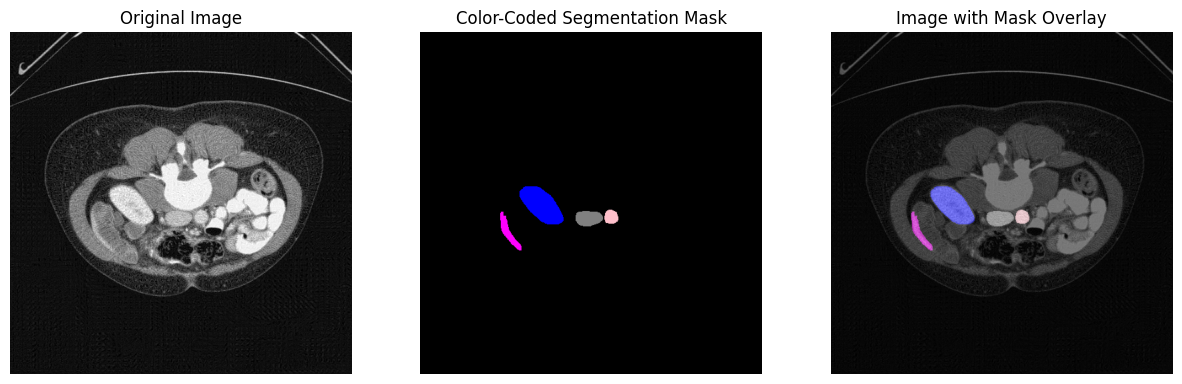

In [5]:
visualize_segmentation_from_numpy_arrays(image, mask)

# Just do some simple automated EDA Visualization
- Personally not so important unlike a traditional classification task where feature engineering is very important to the XGBoost model
- We will further do some data augmentation, before running the entire EDA again

                                             |          | [  0%]   00:00 -> (? left)


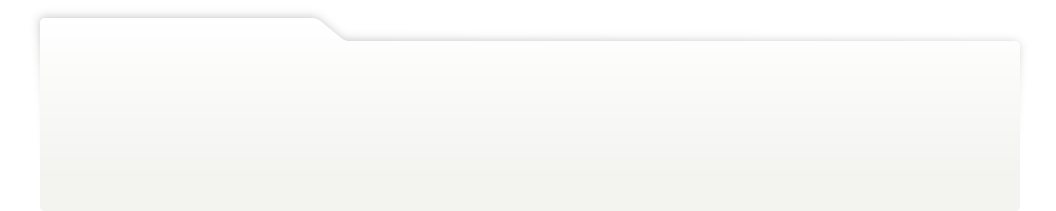
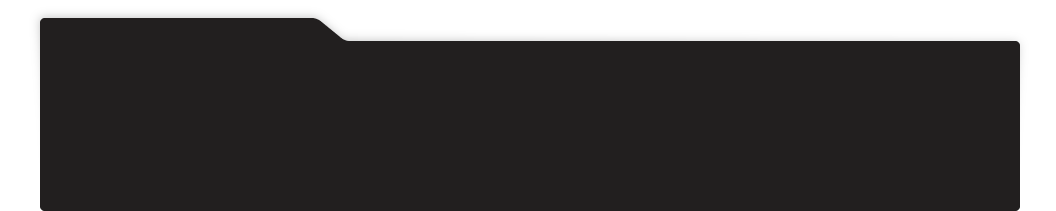
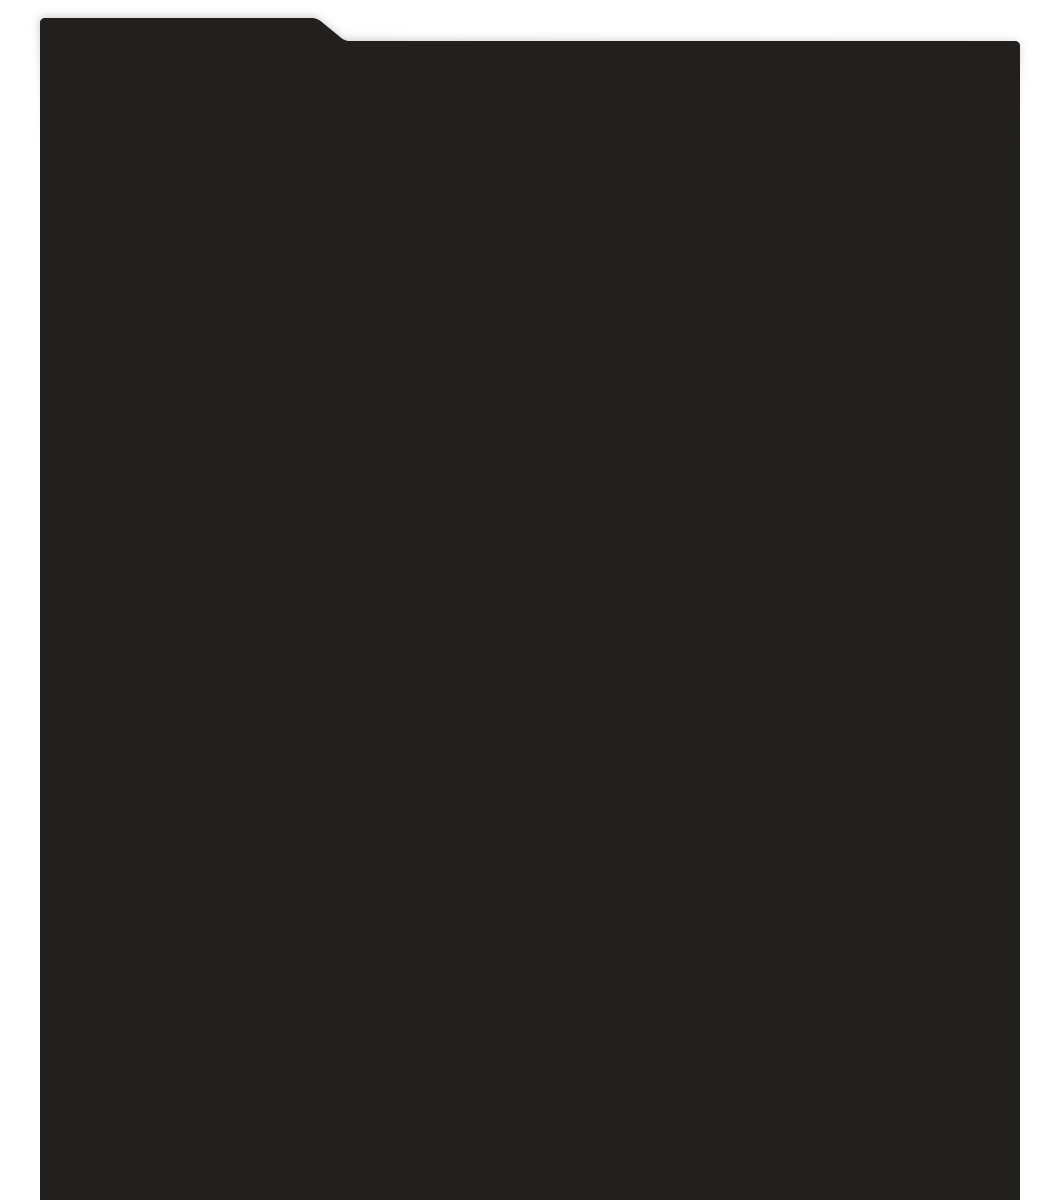
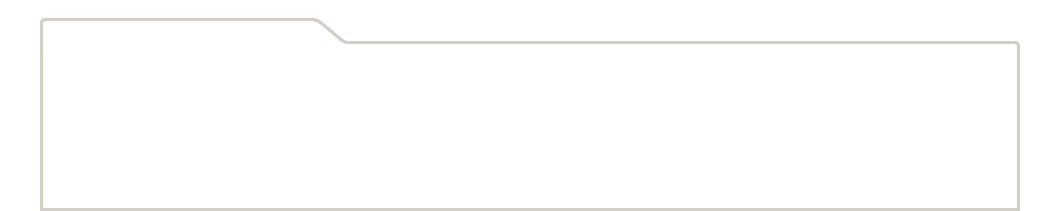
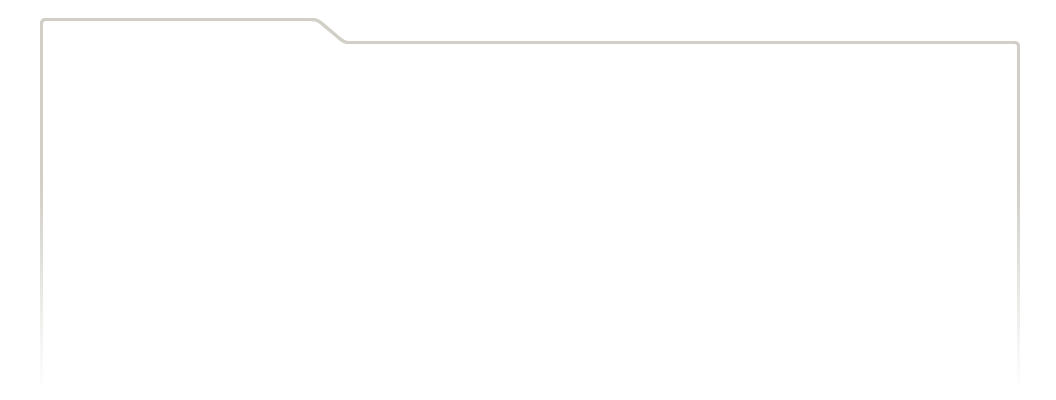
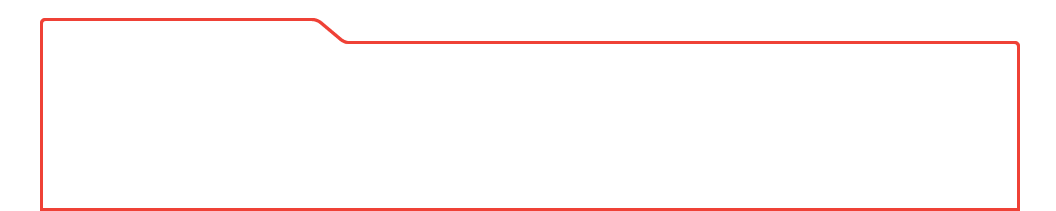
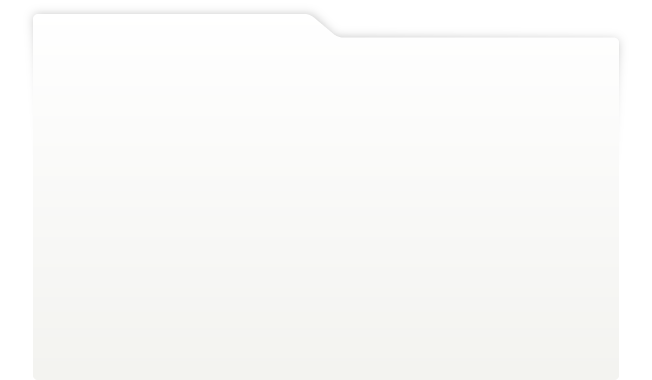
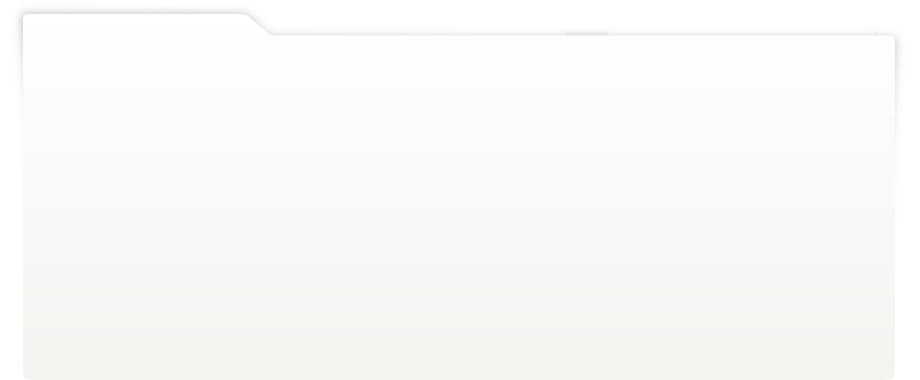
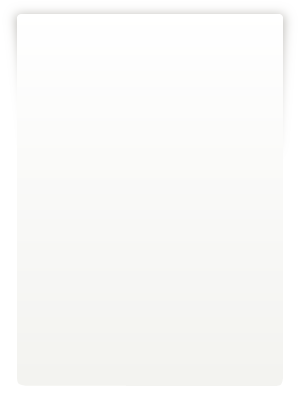
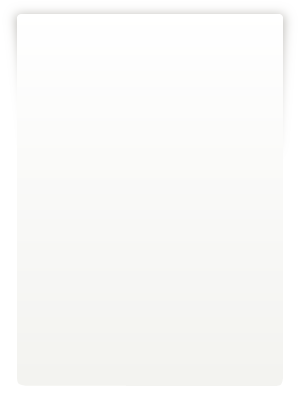
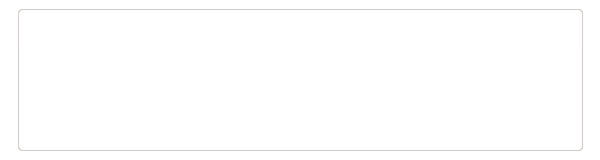
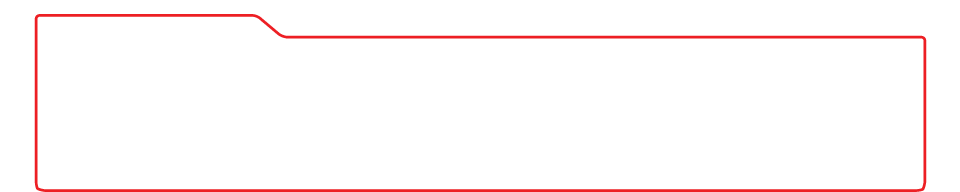
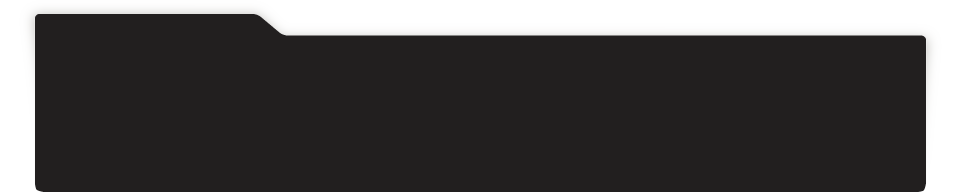
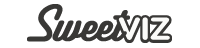
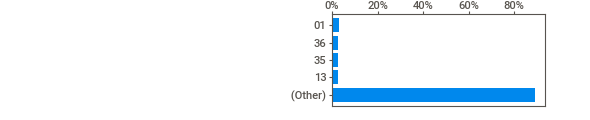
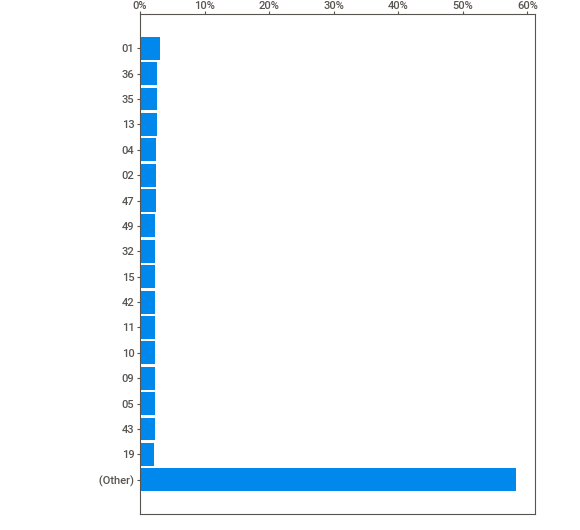
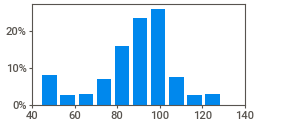
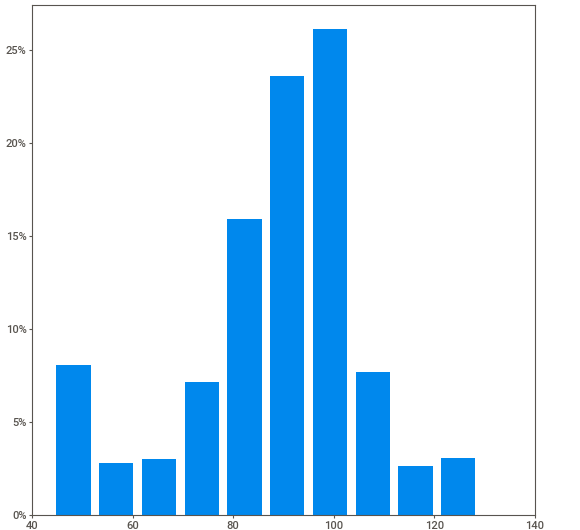
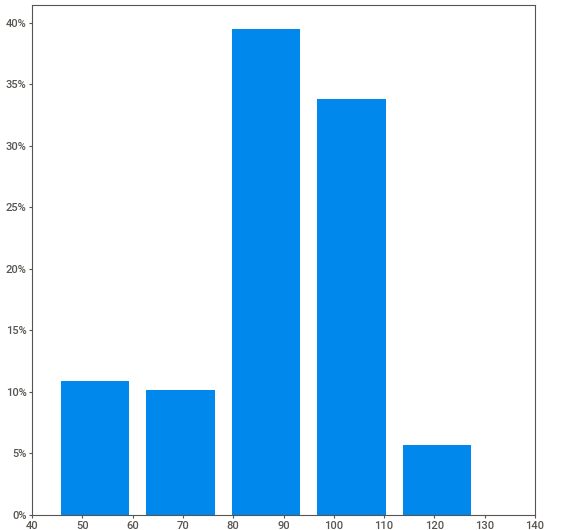
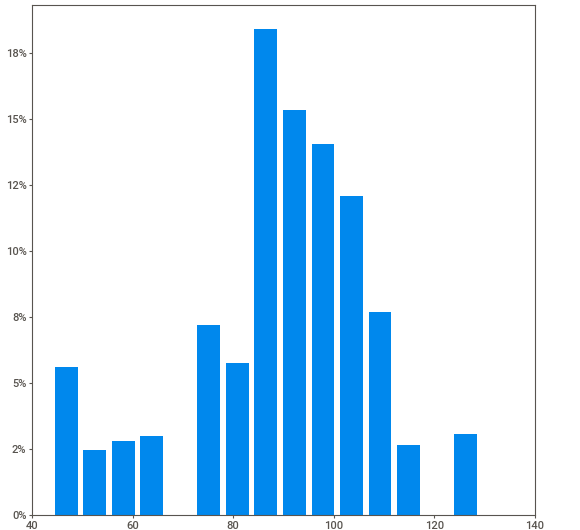
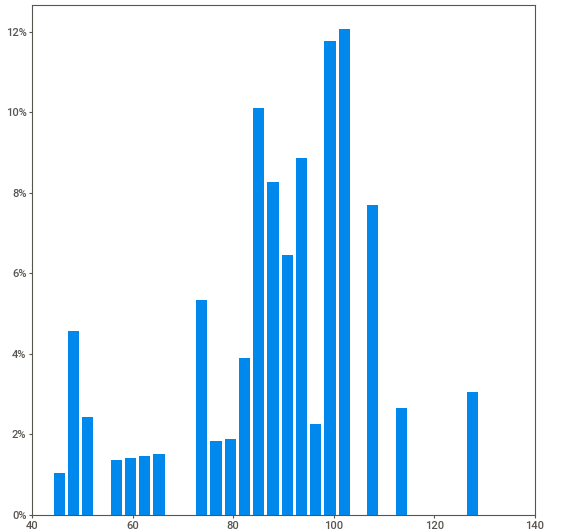
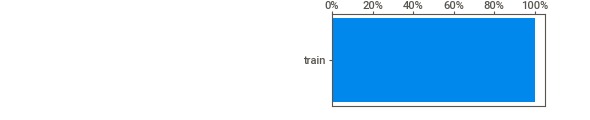
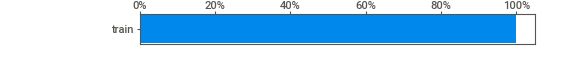
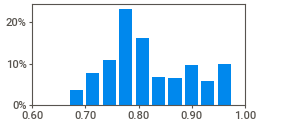
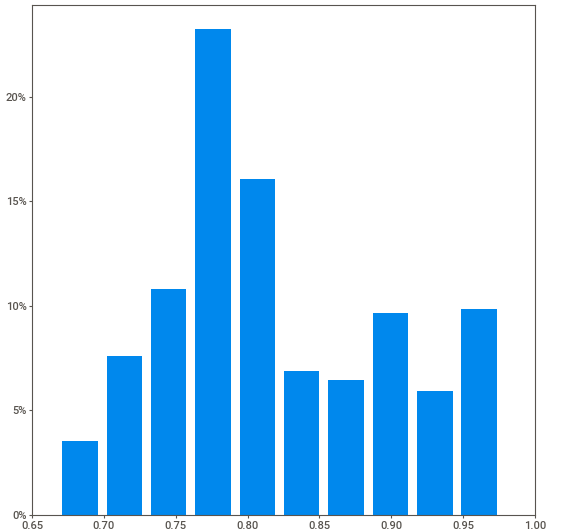
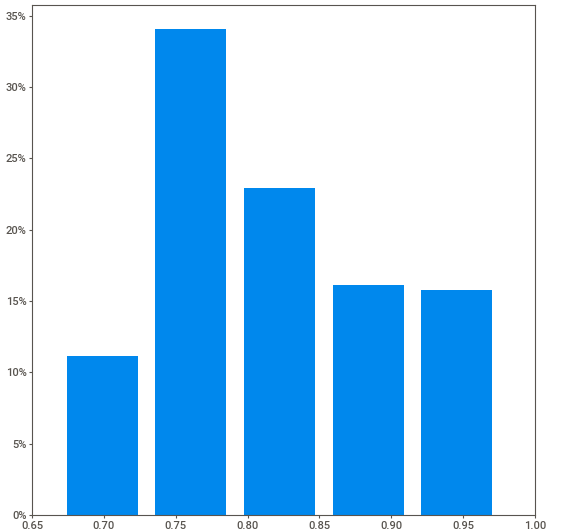
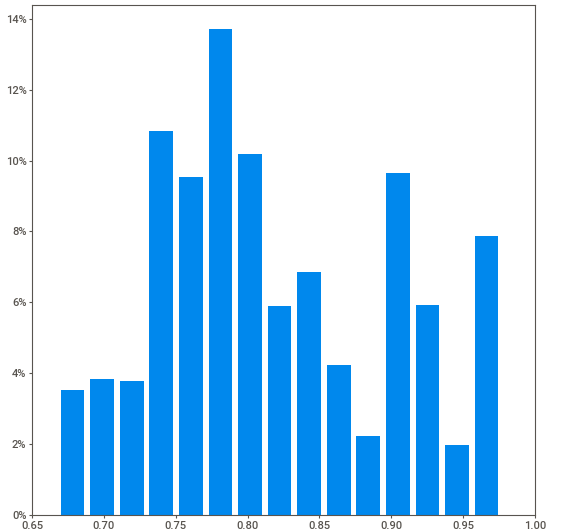
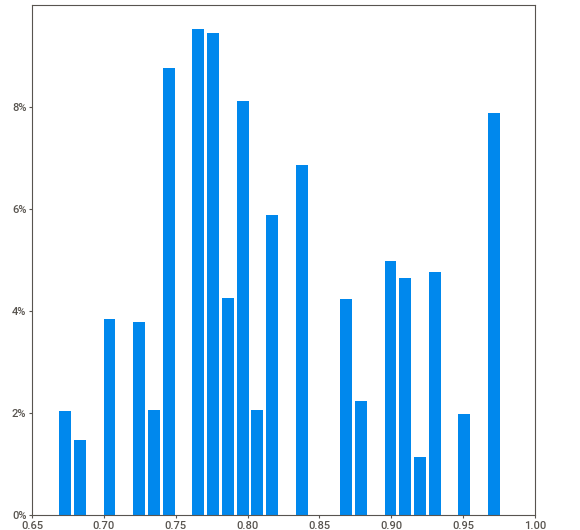
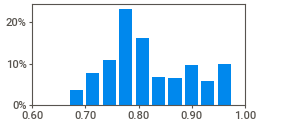
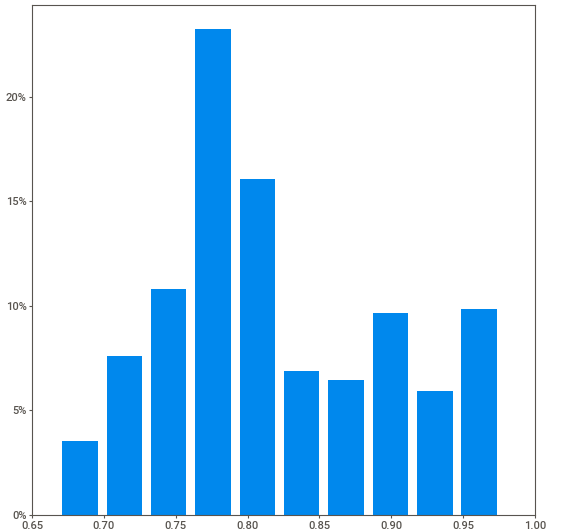
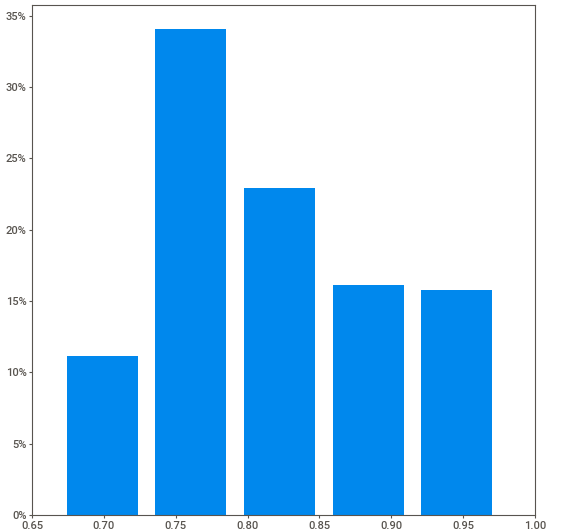
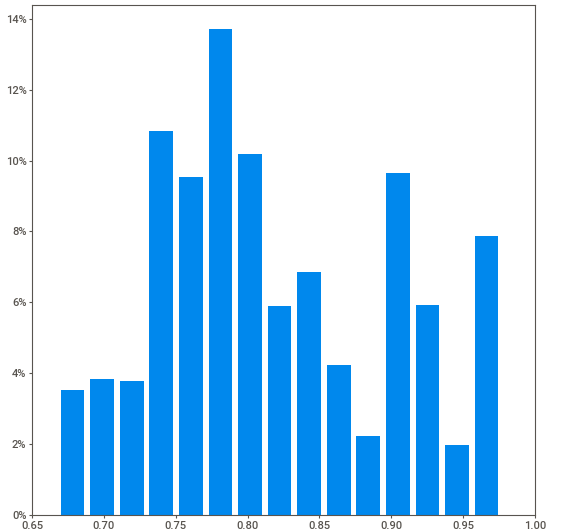
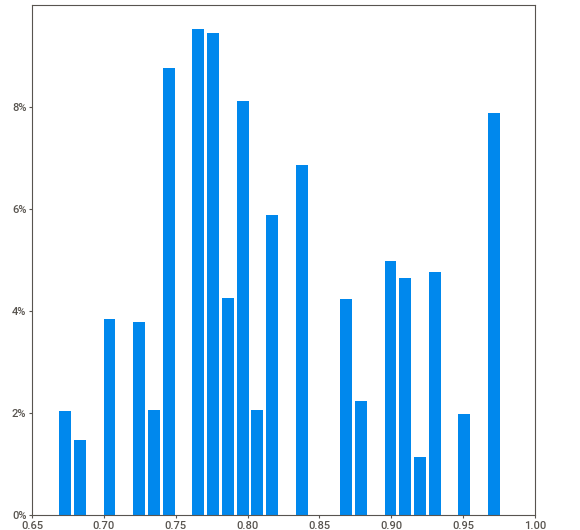
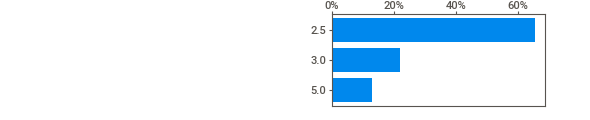
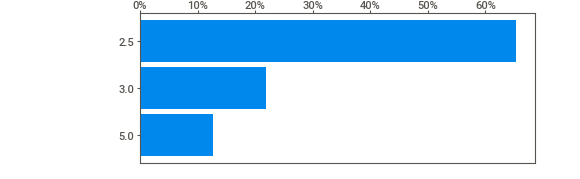
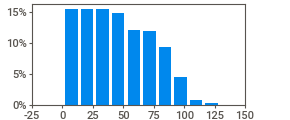
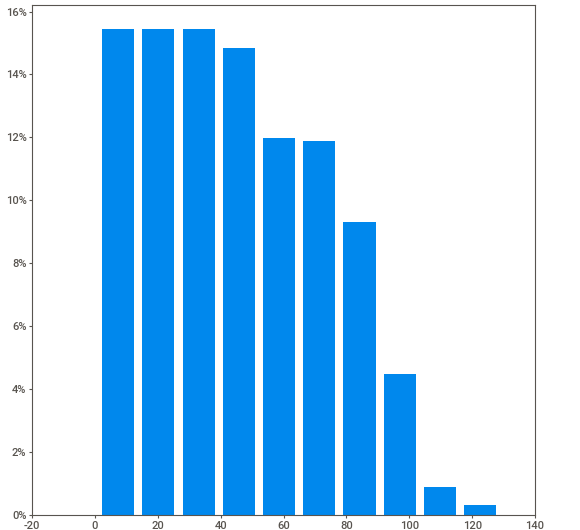
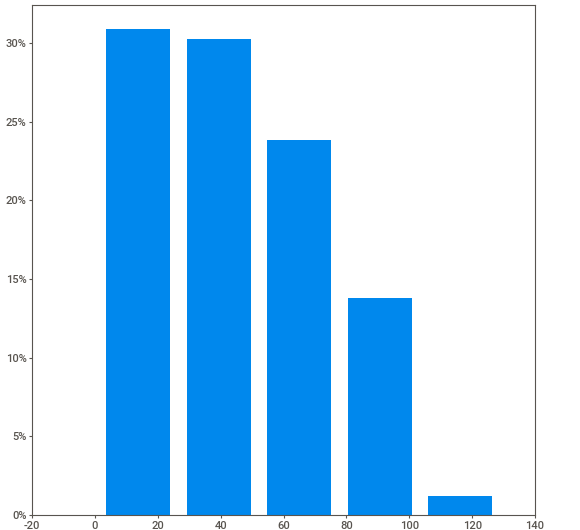
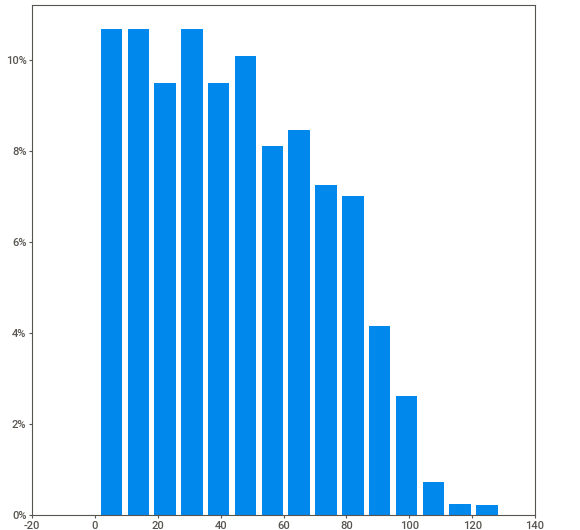
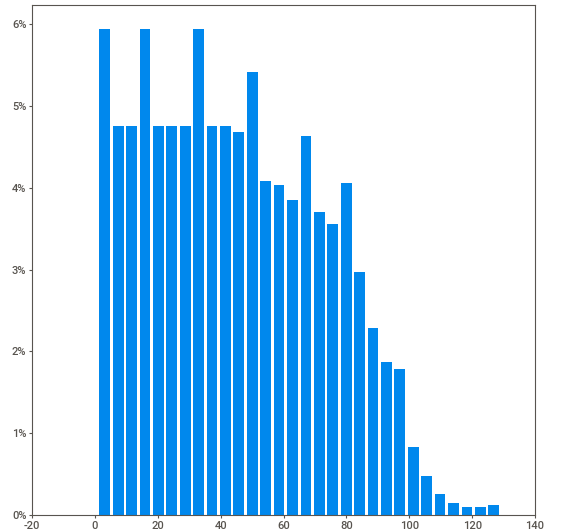
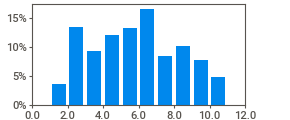
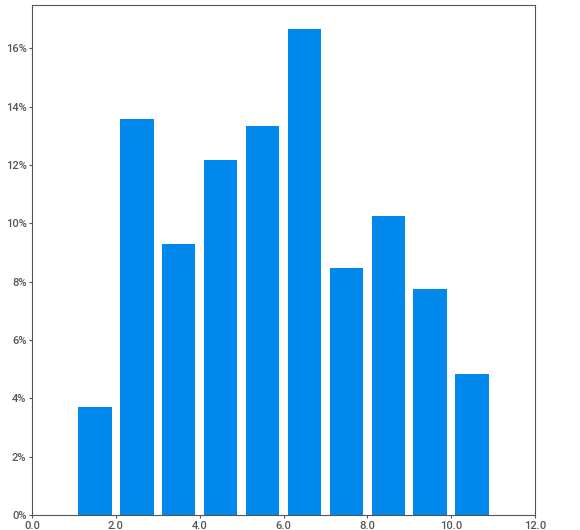
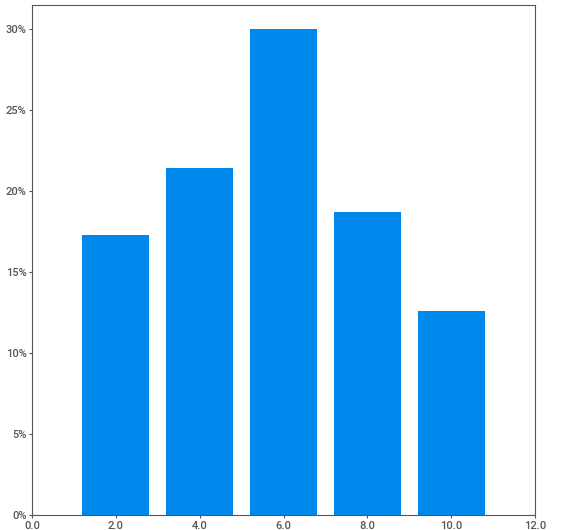
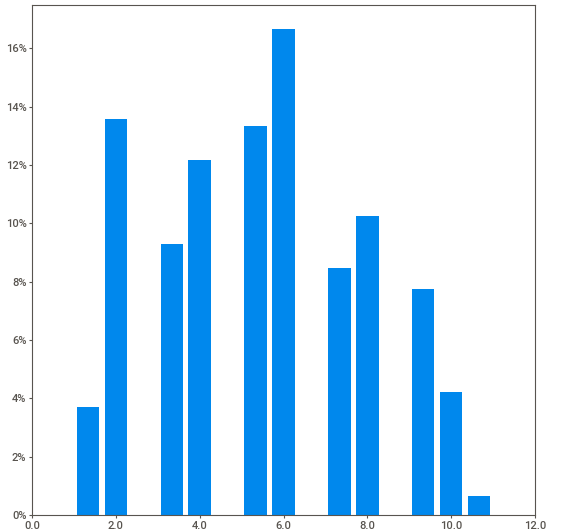
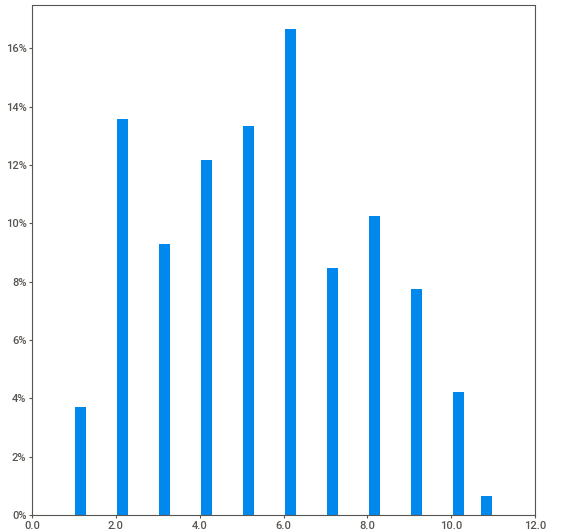
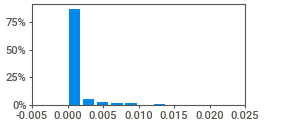
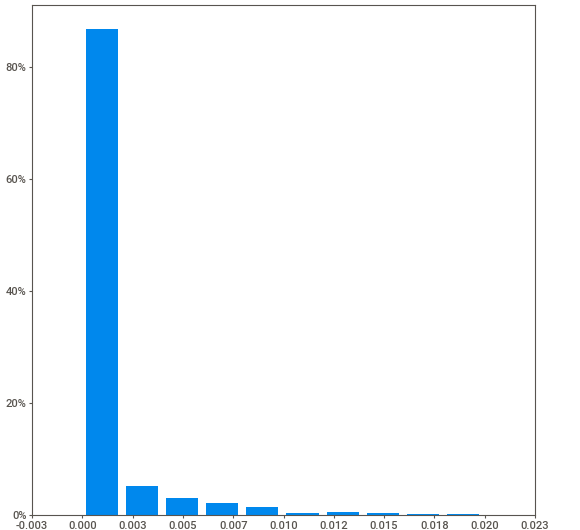
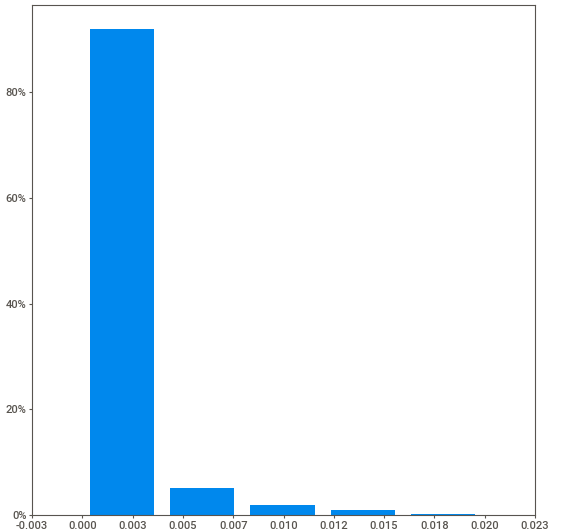
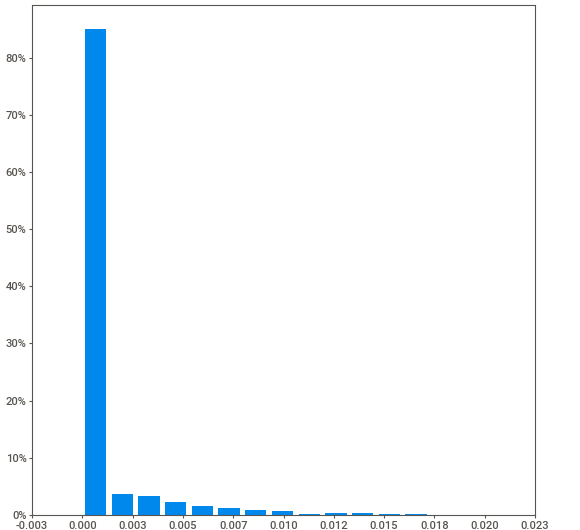
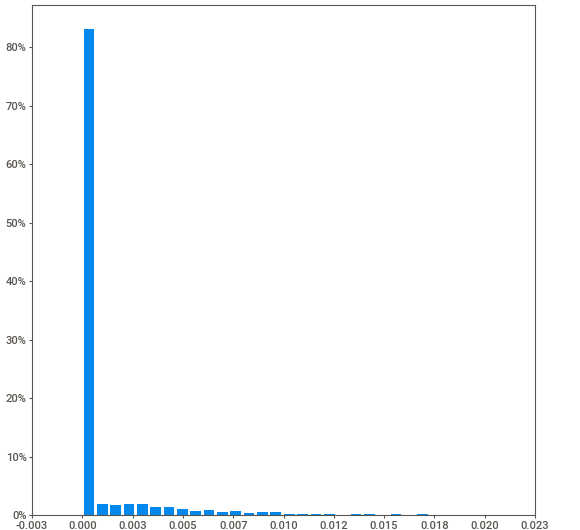
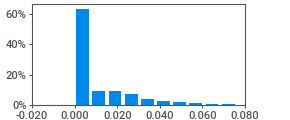
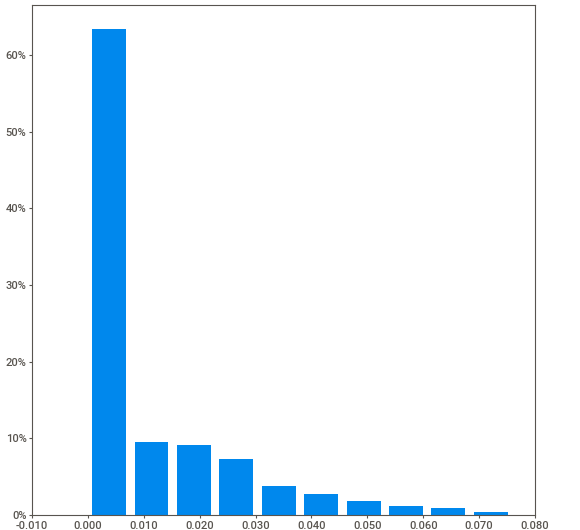
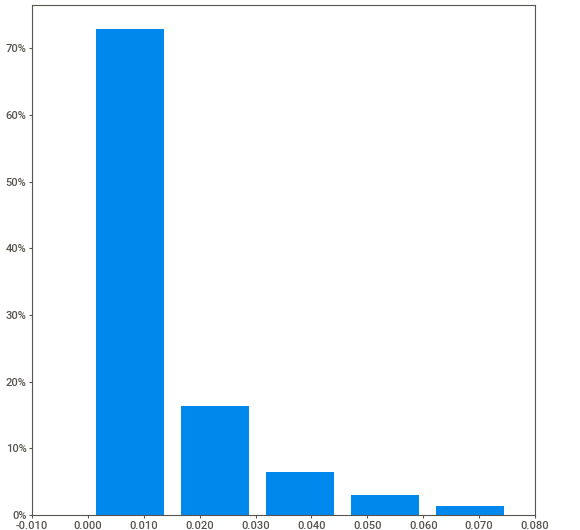
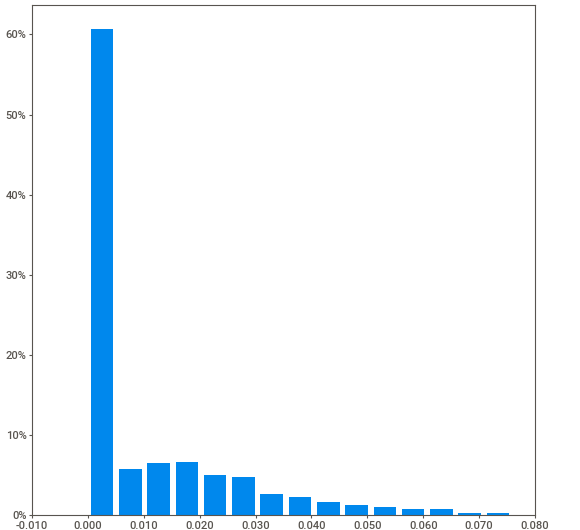
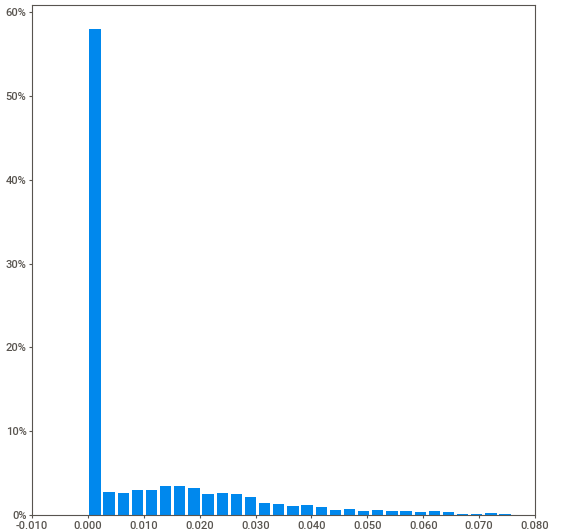
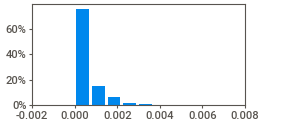
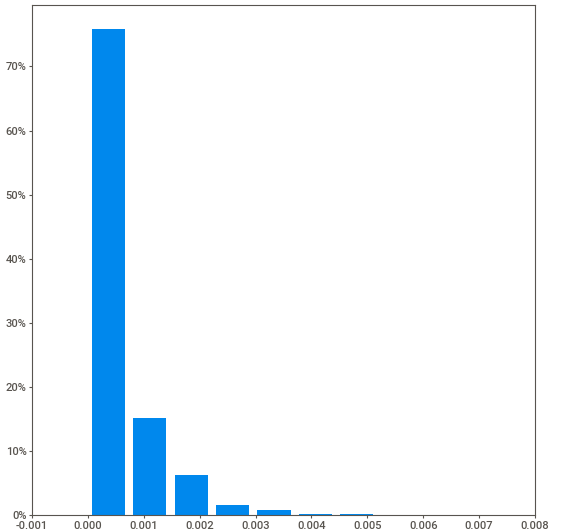
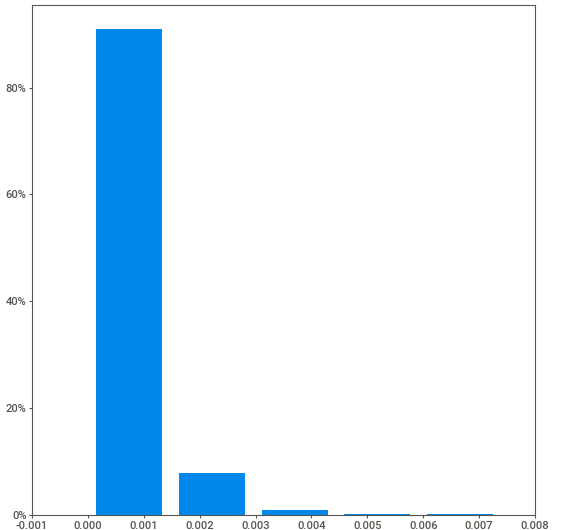
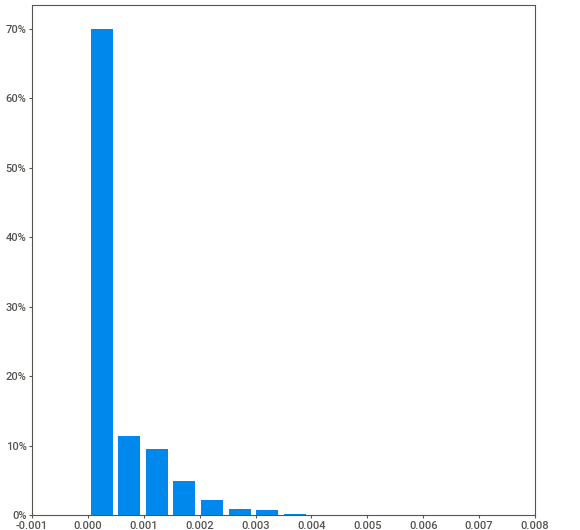
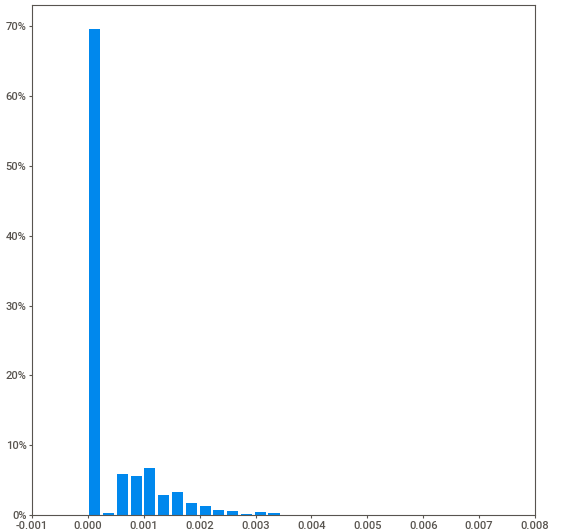
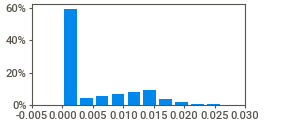
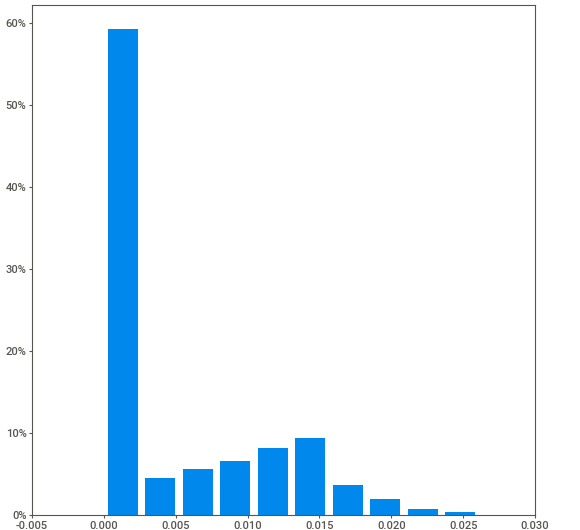
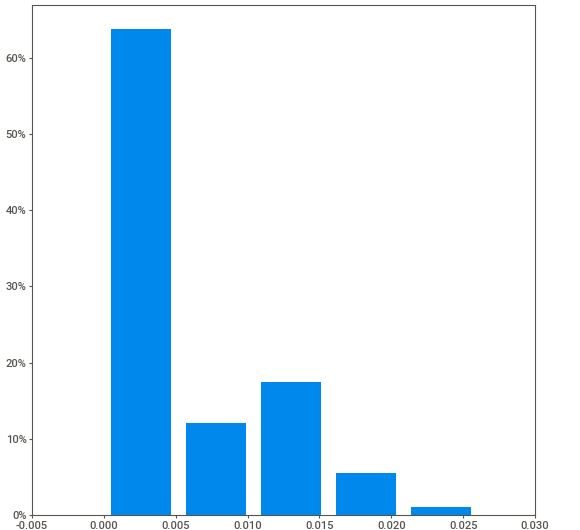
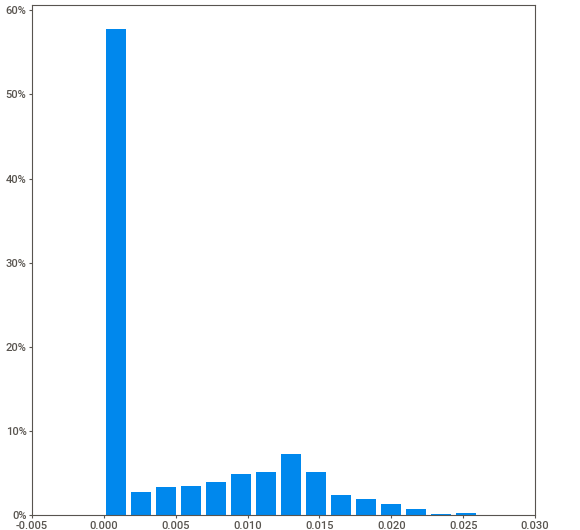
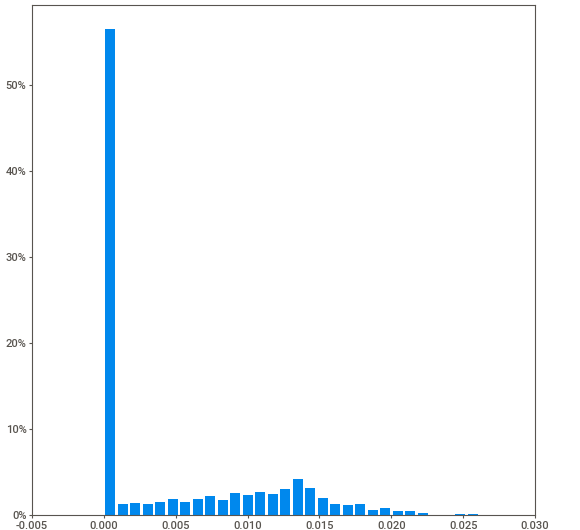
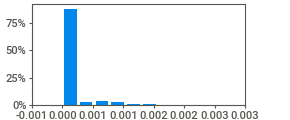
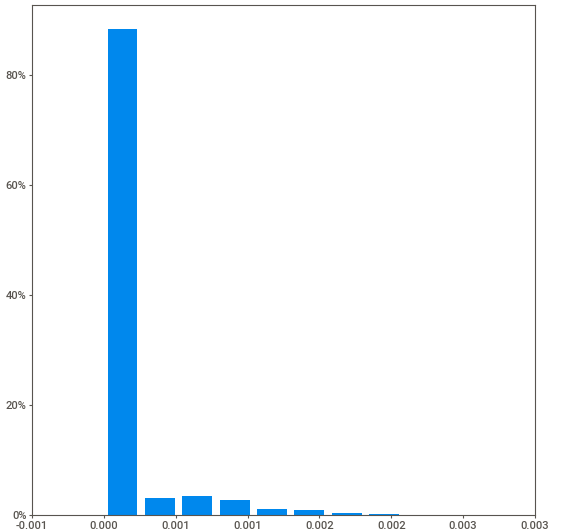
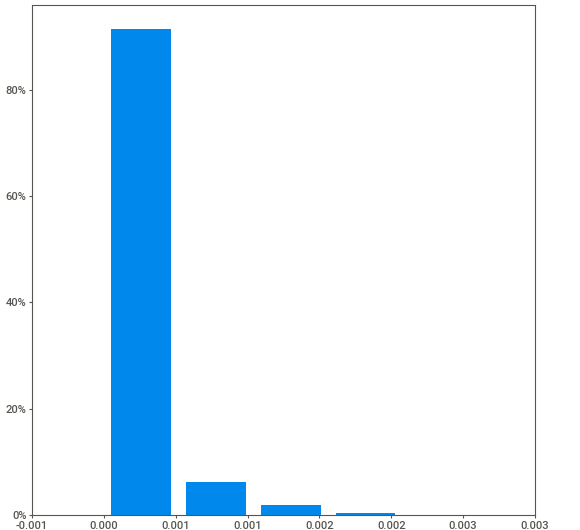
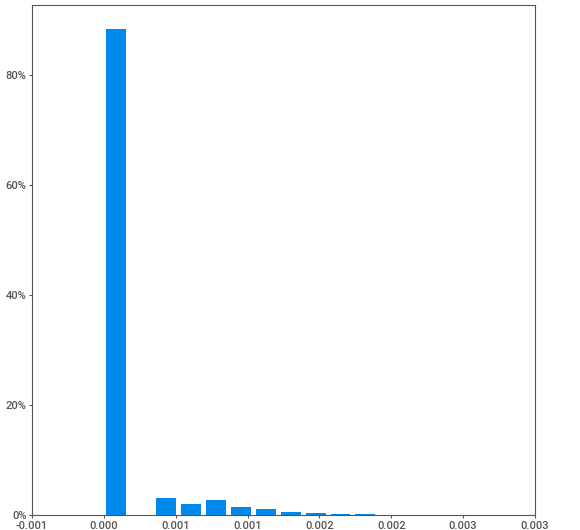
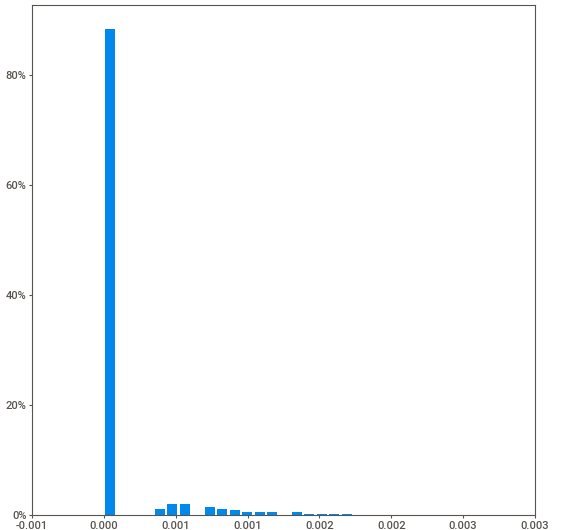
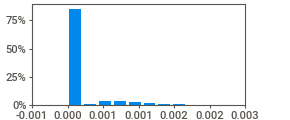
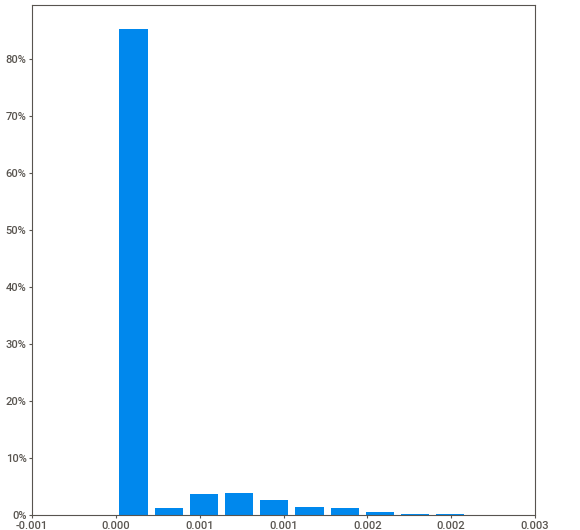
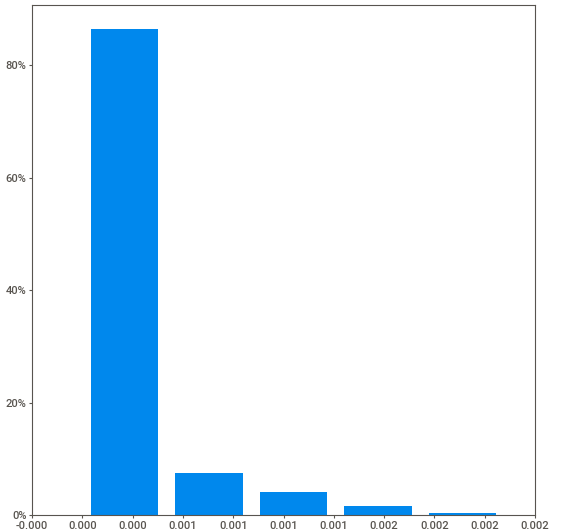
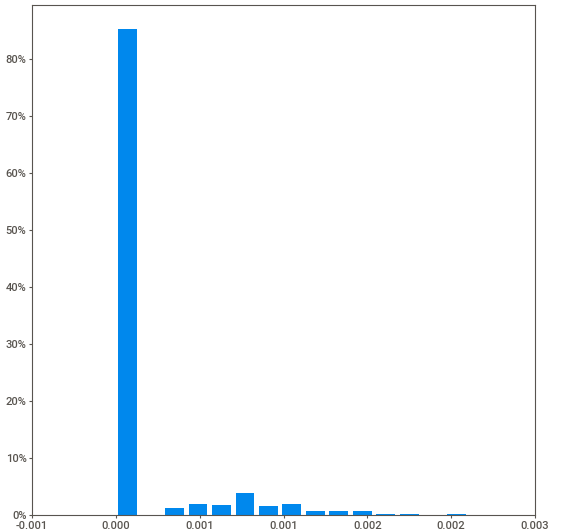
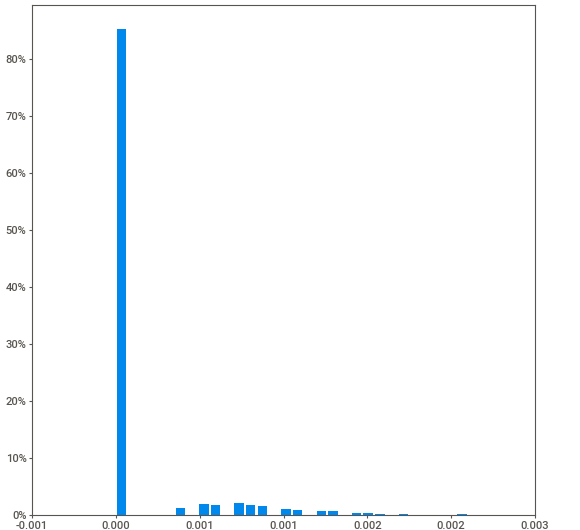
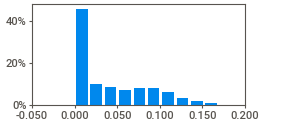
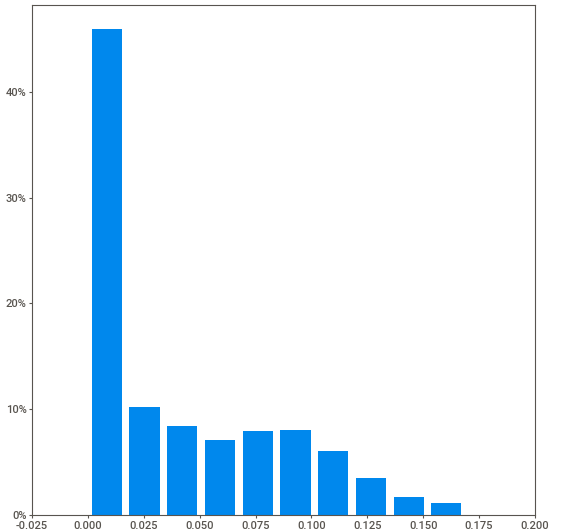
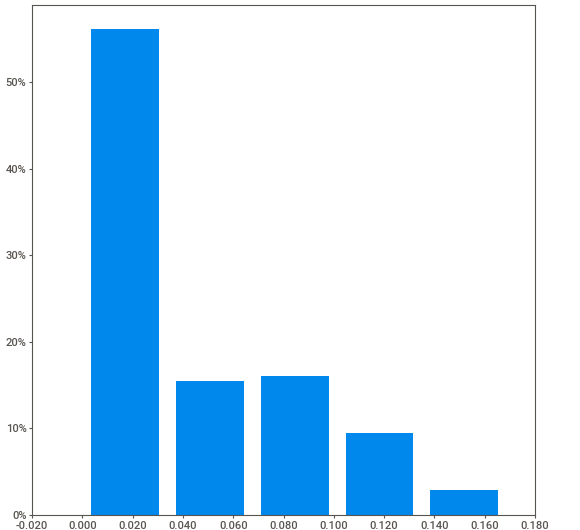
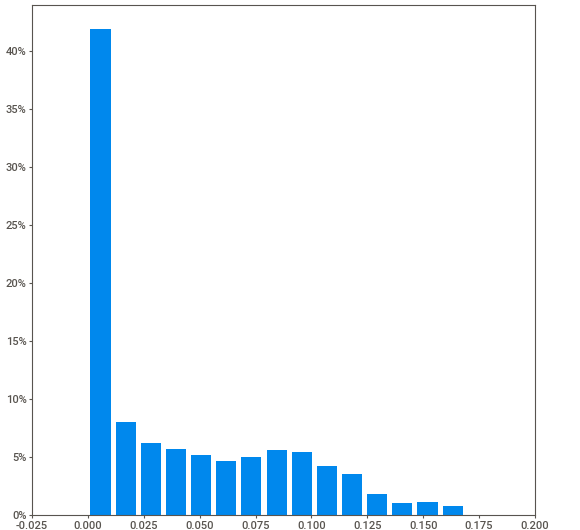
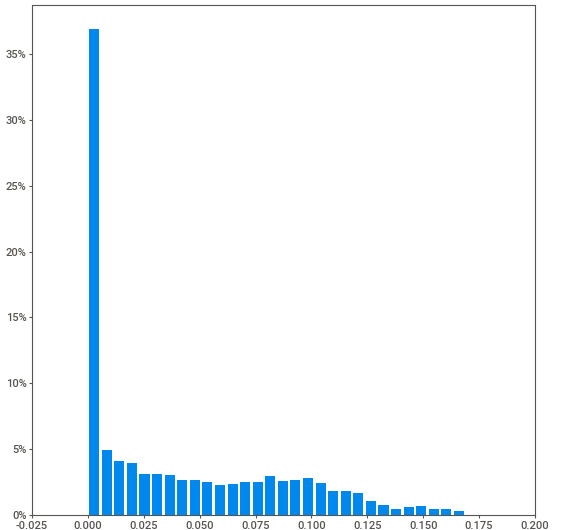
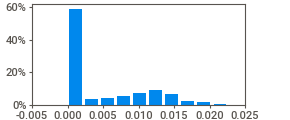
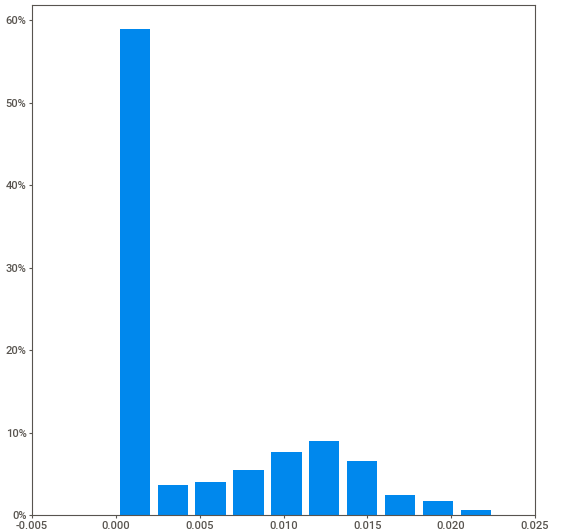
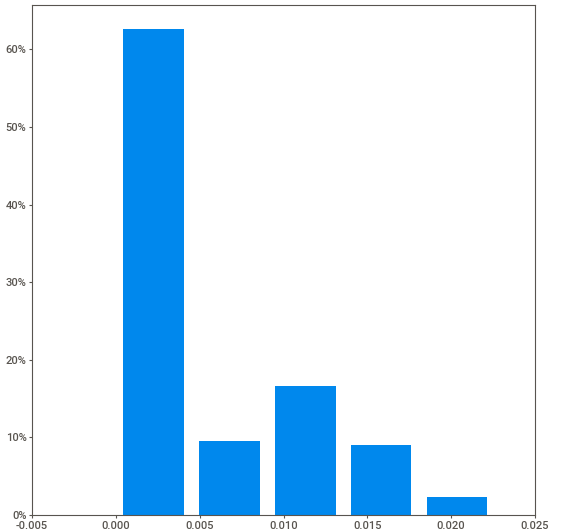
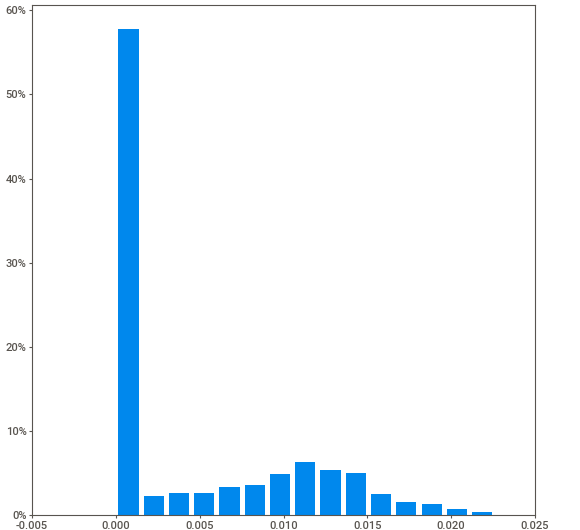
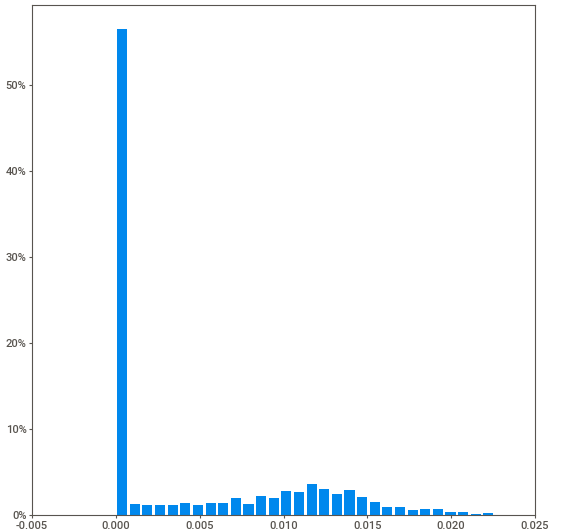
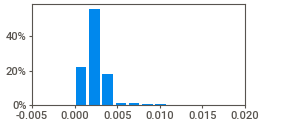
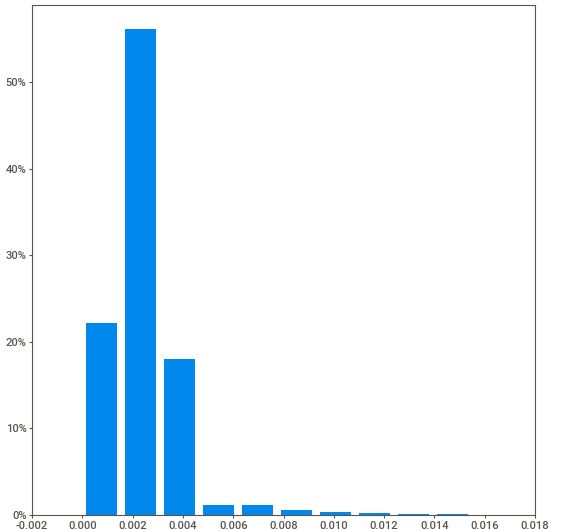
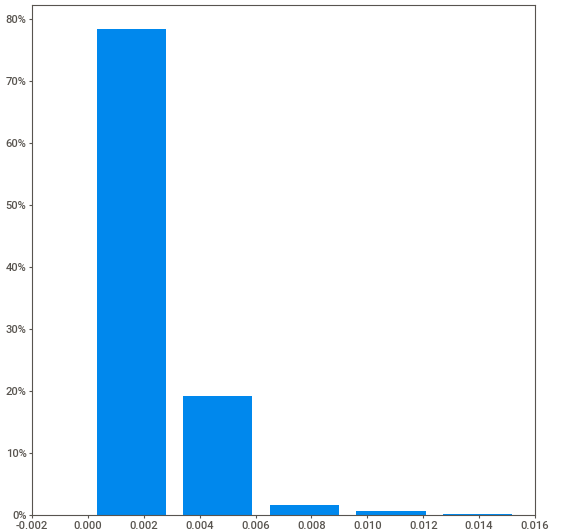
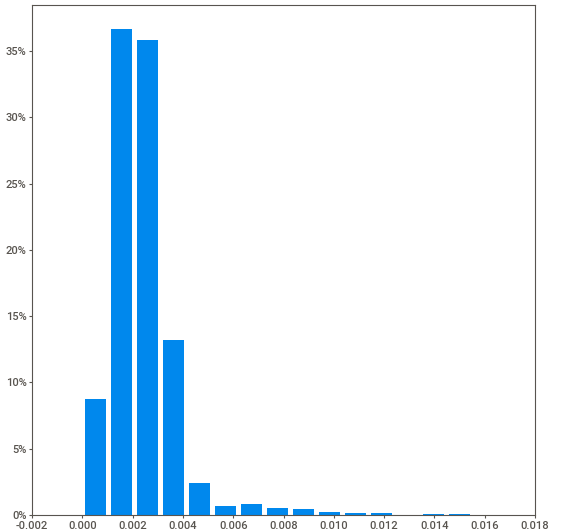
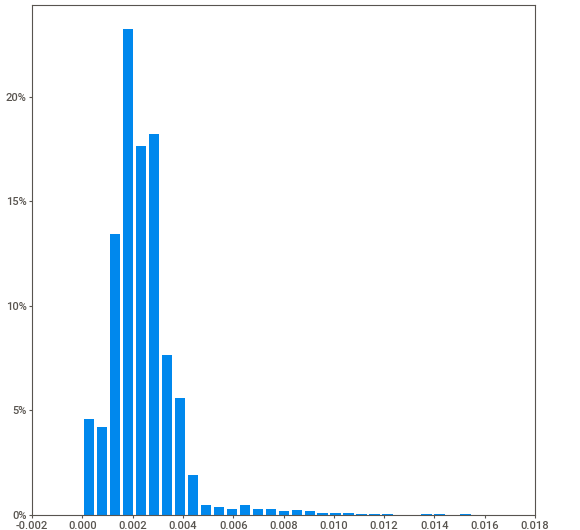
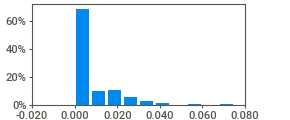
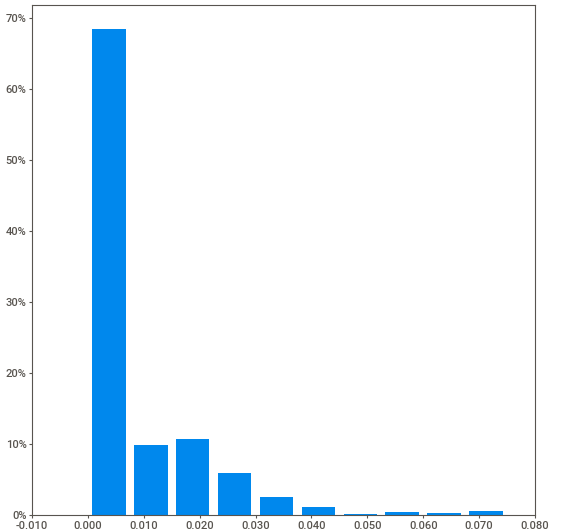
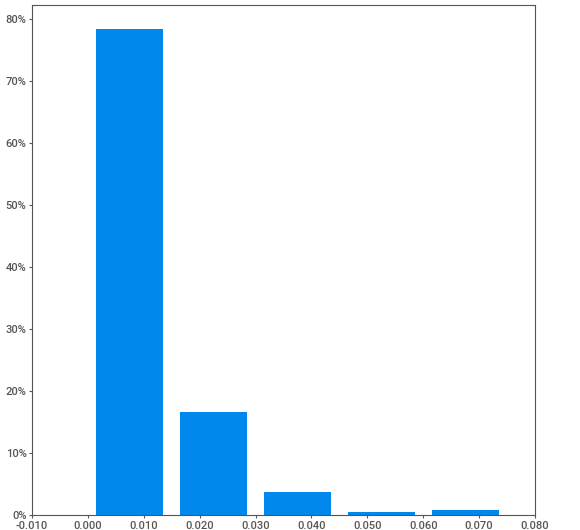
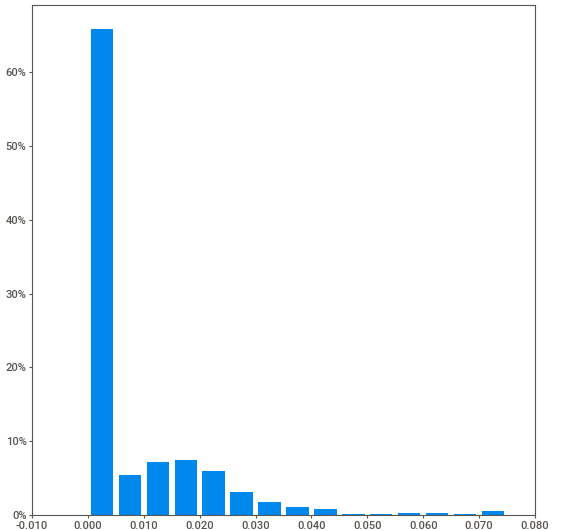
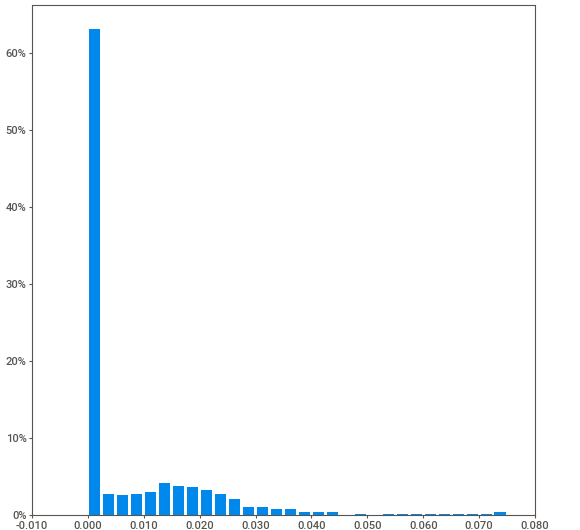
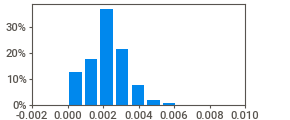
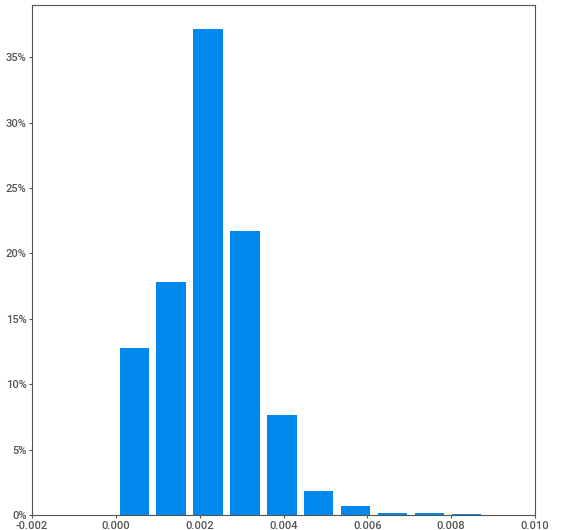
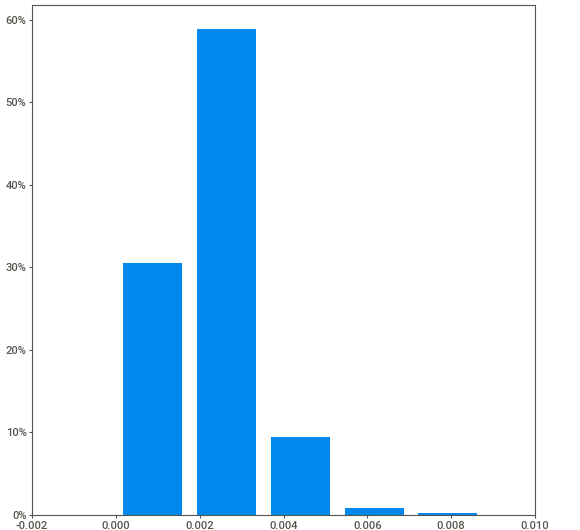
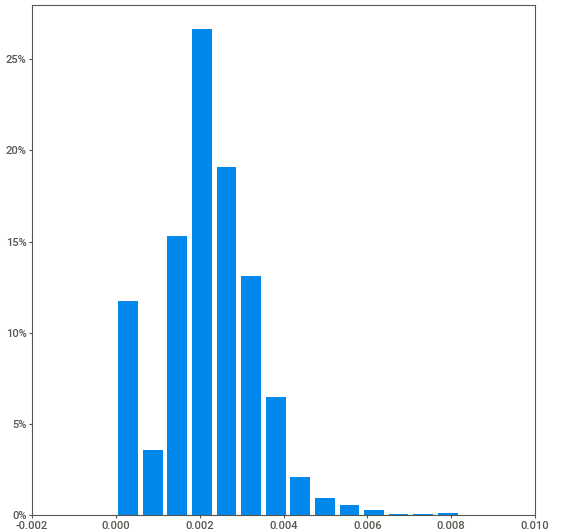
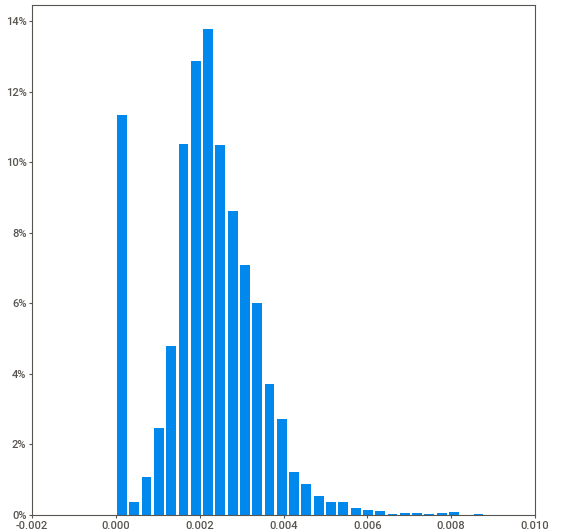
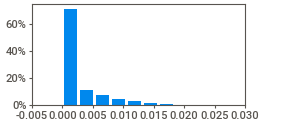
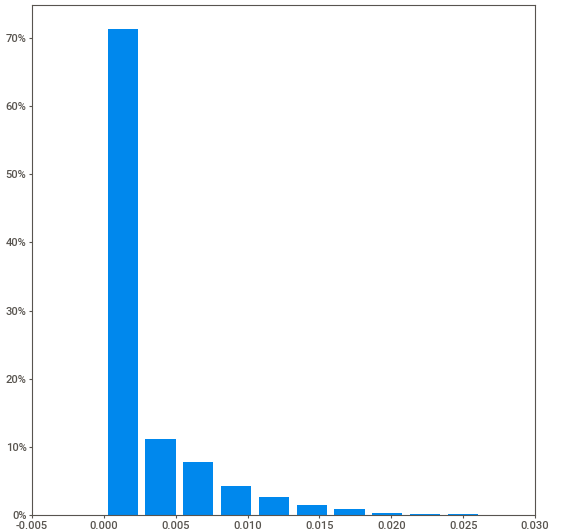
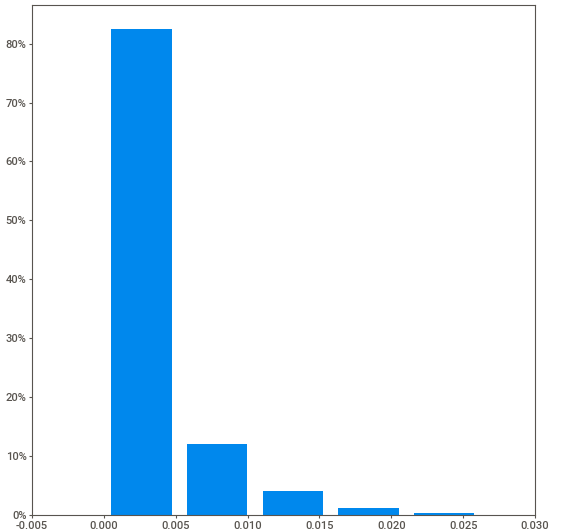
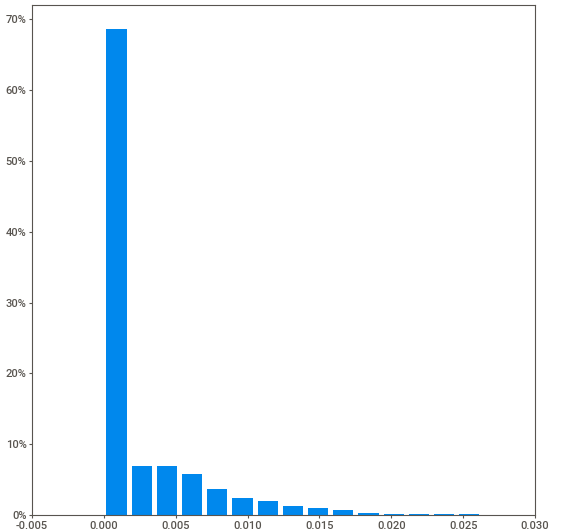
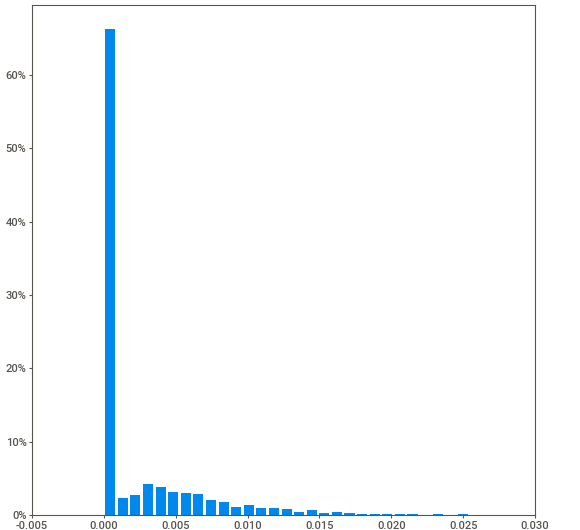
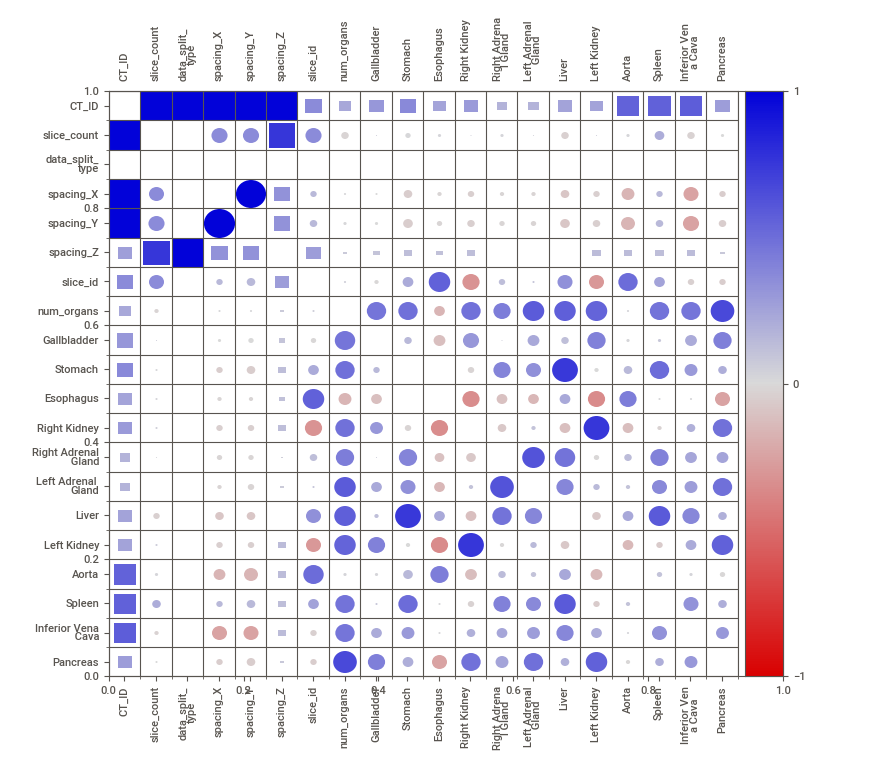
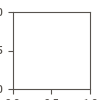

Report 'results/EDA/train_data_EDA_report.html' was saved to storage.


In [6]:
# Train is slice level
generate_sweetviz_report(
    train_data, report_filename="results/EDA/train_data_EDA_report.html"
)

                                             |          | [  0%]   00:00 -> (? left)


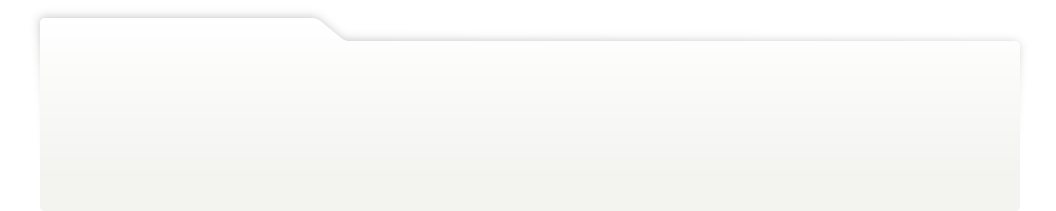
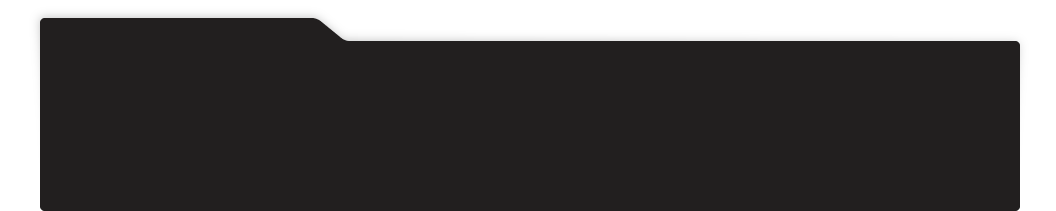
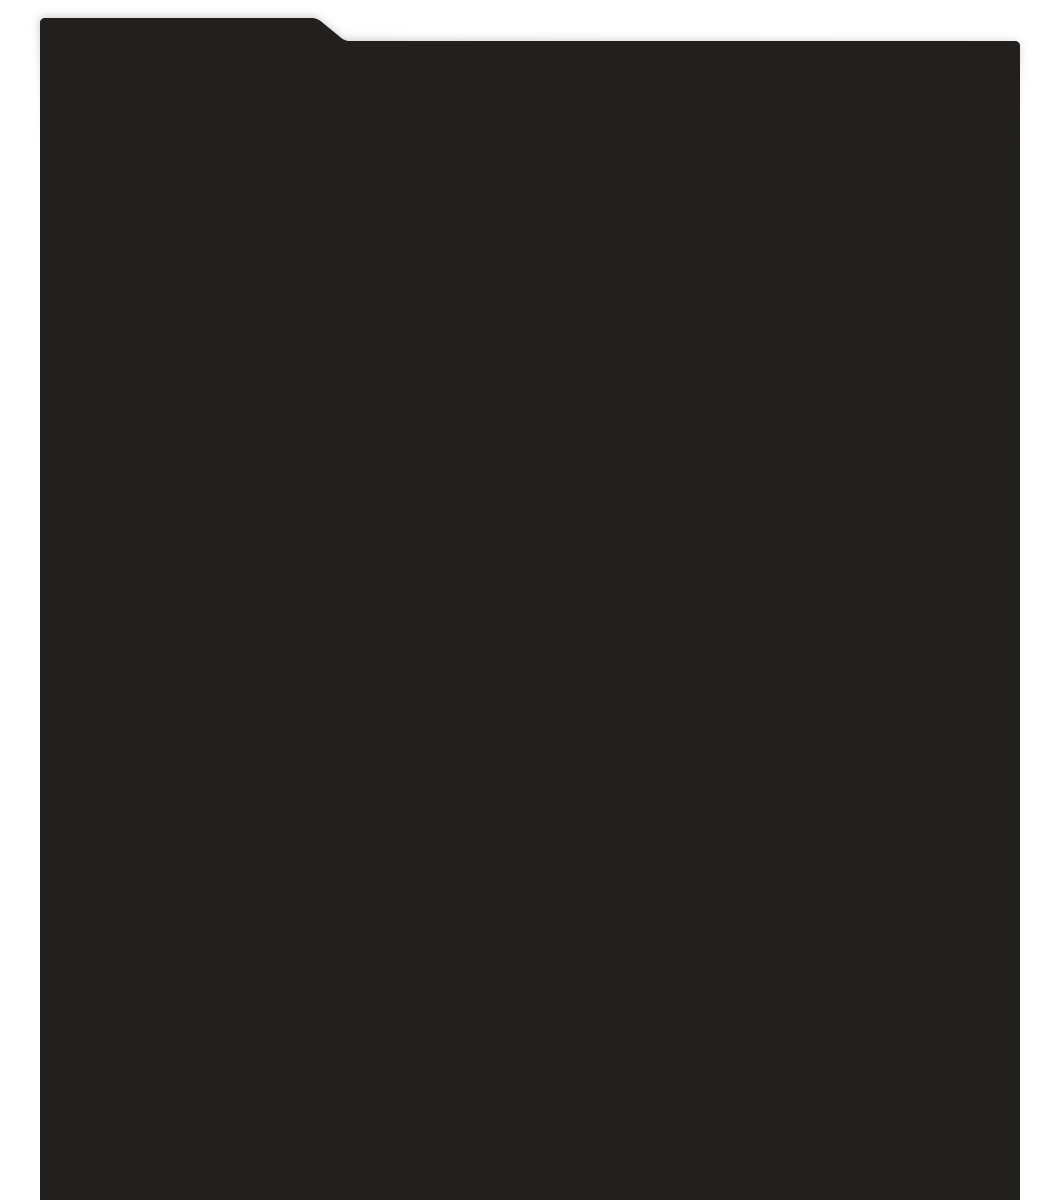
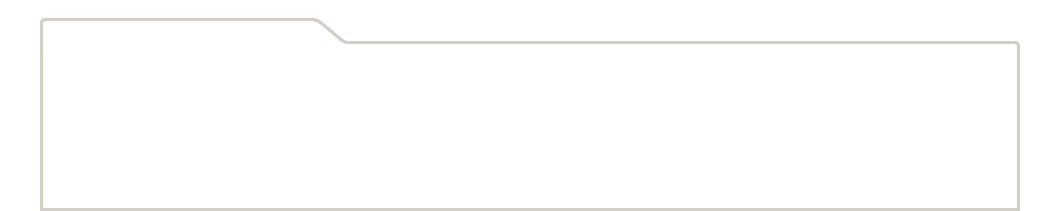
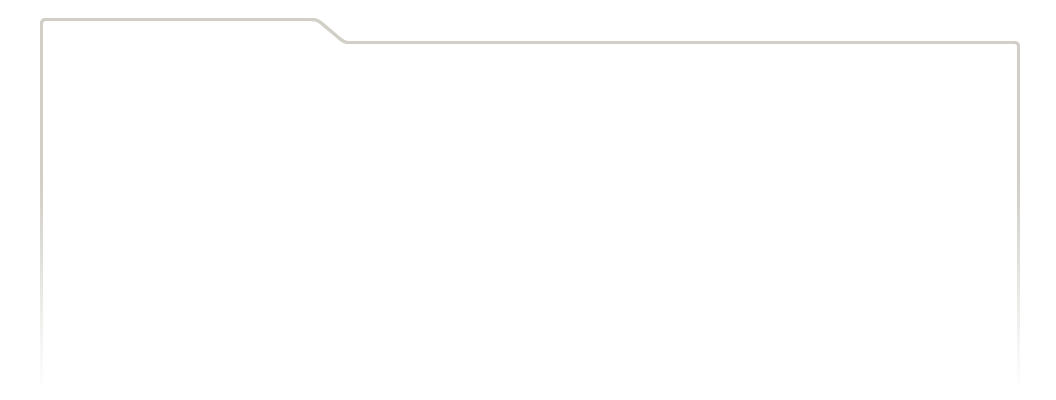
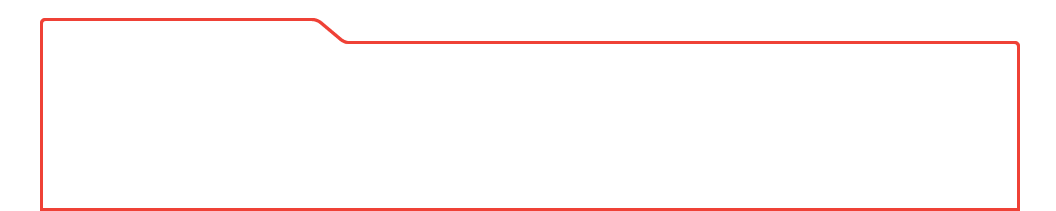
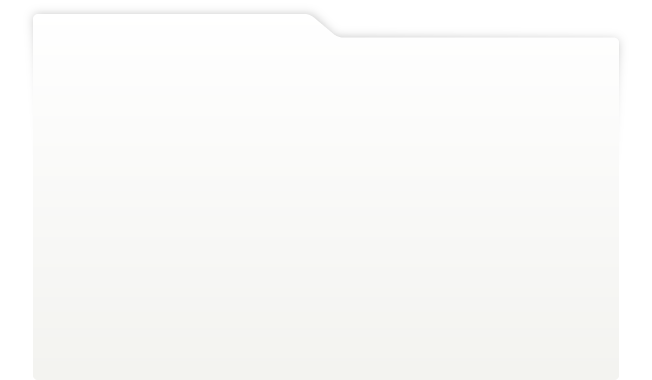
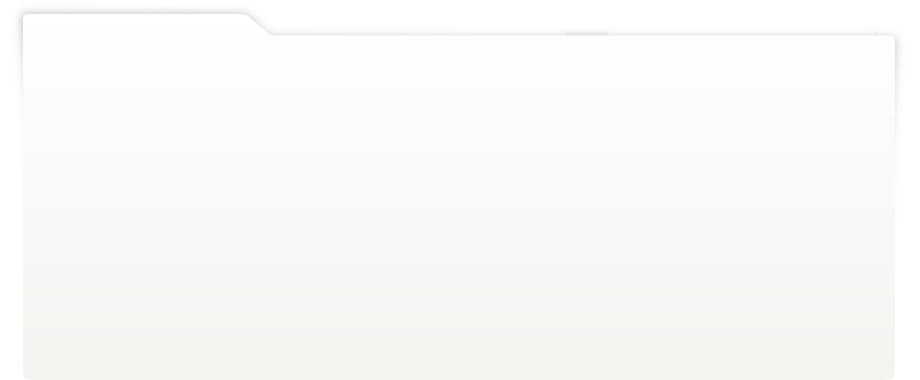
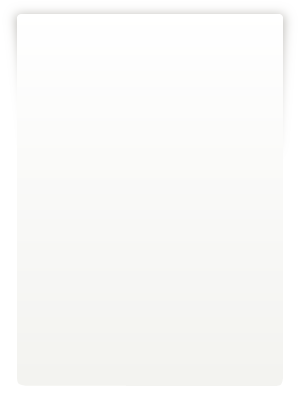
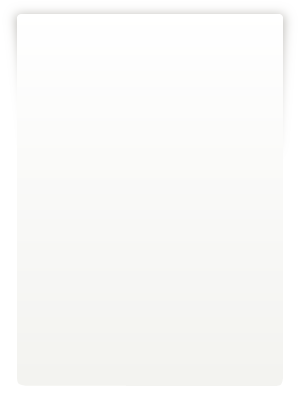
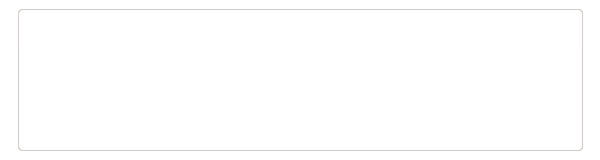
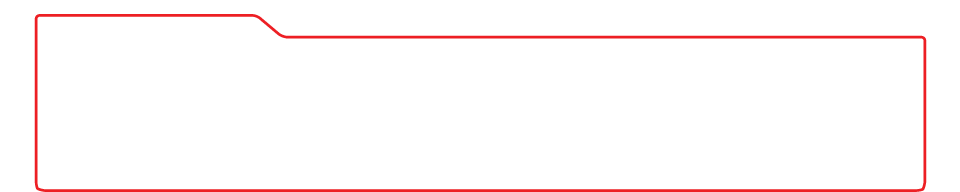
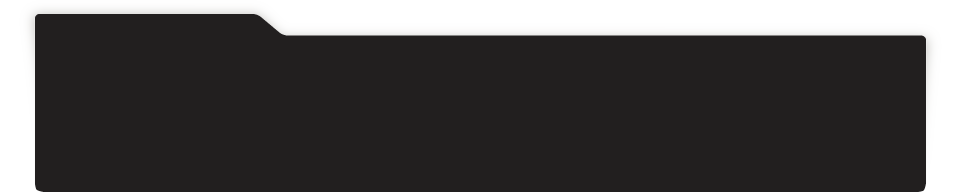
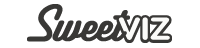
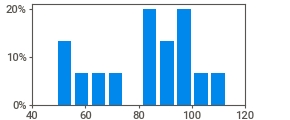
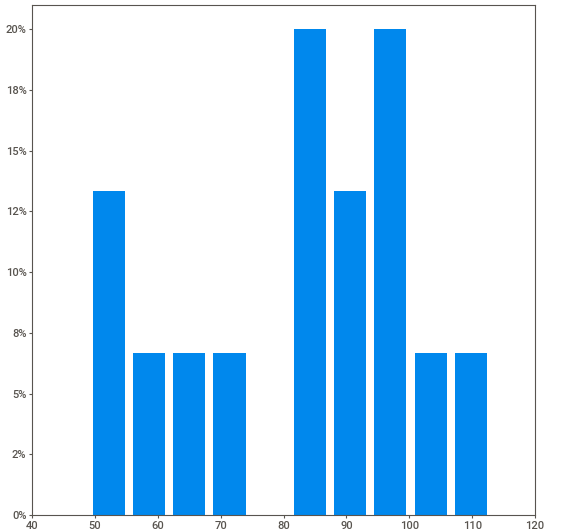
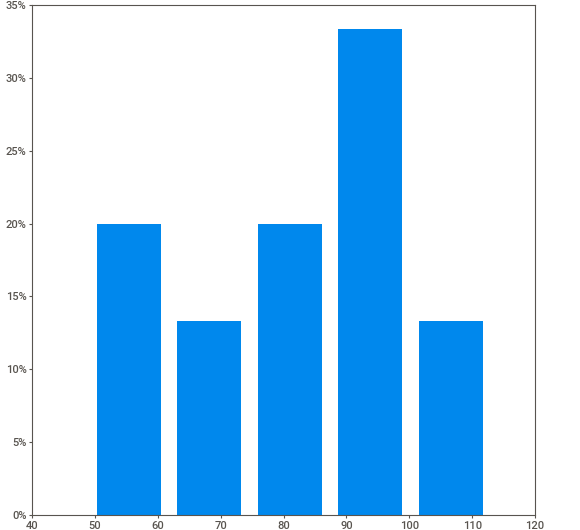
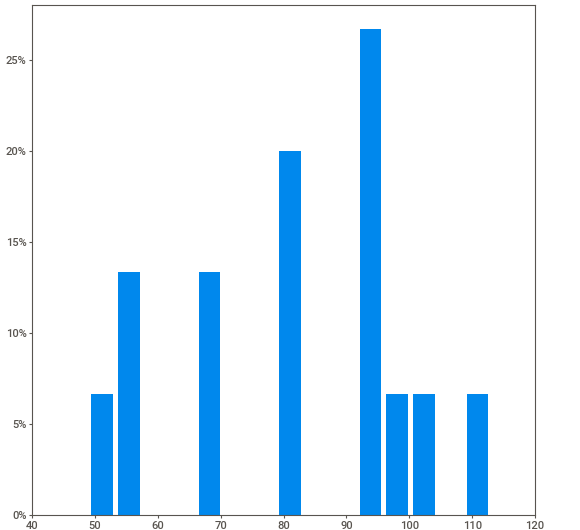
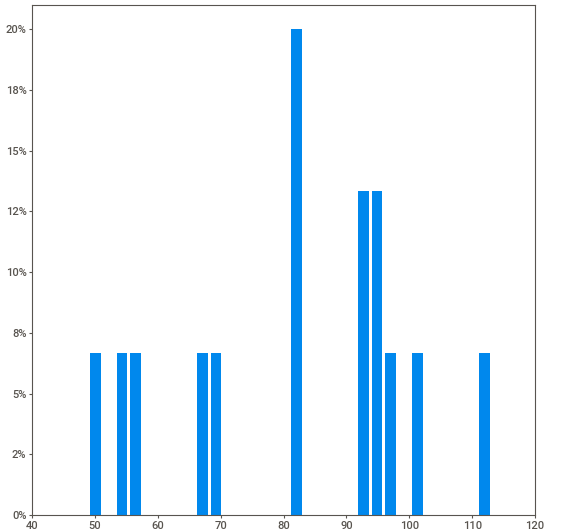
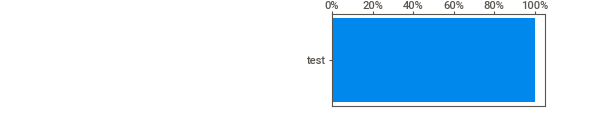
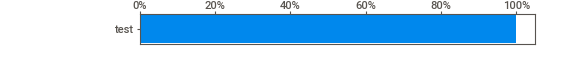
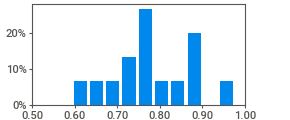
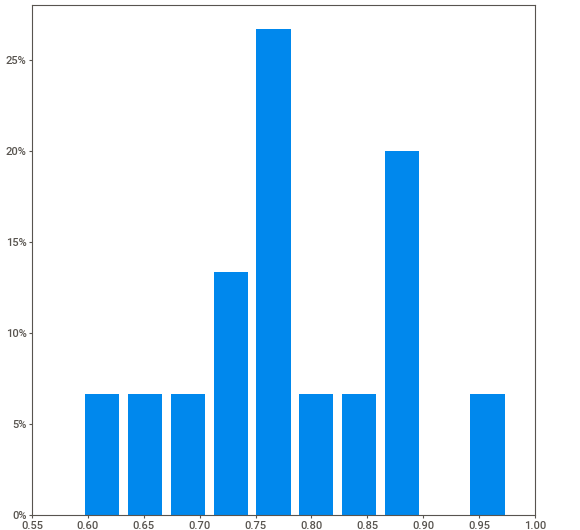
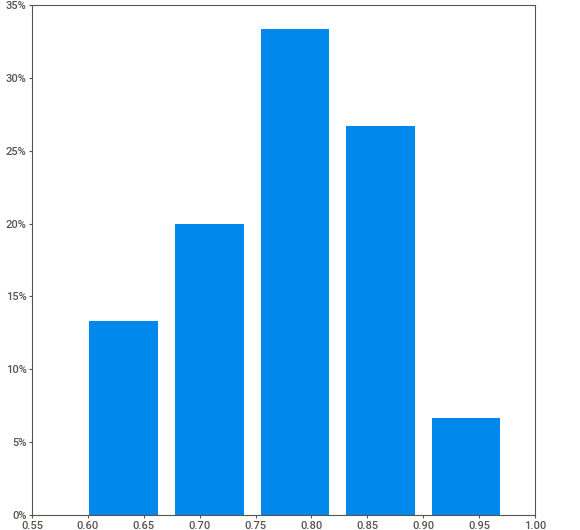
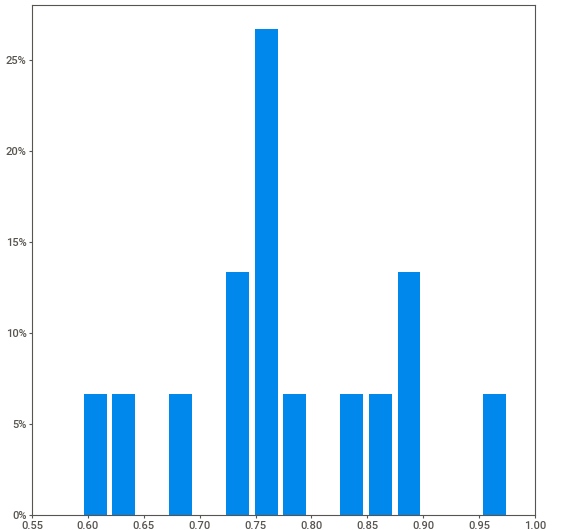
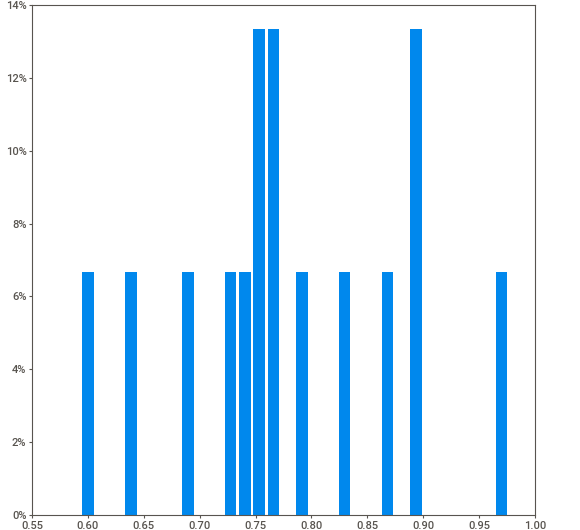
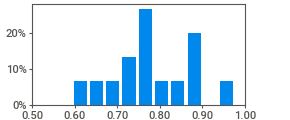
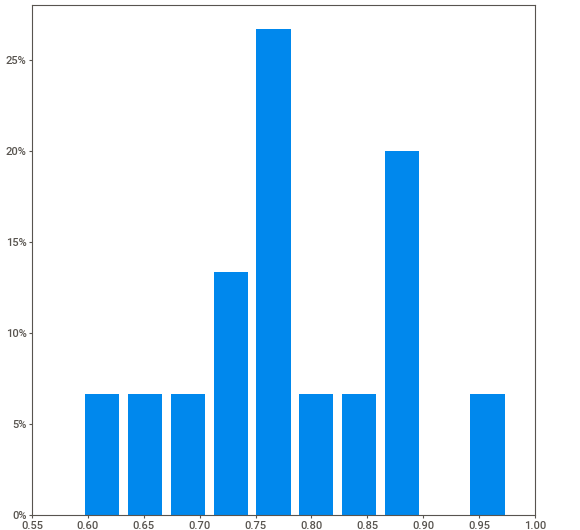
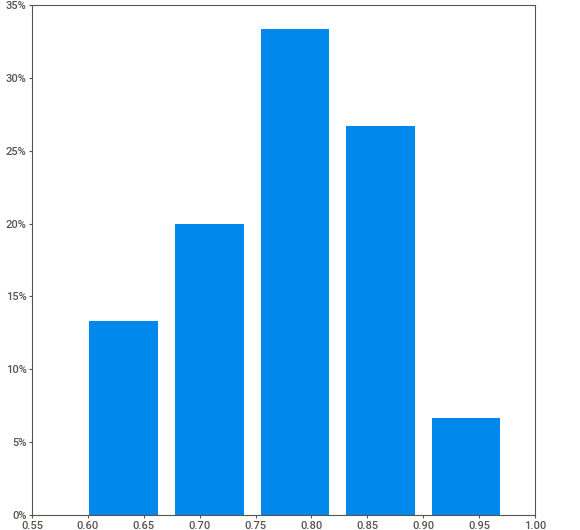
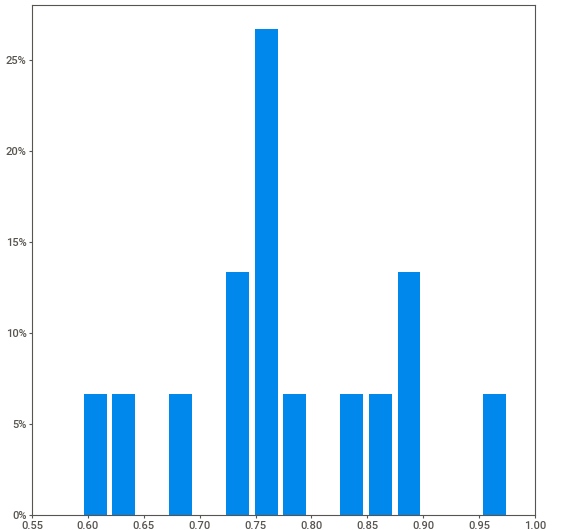
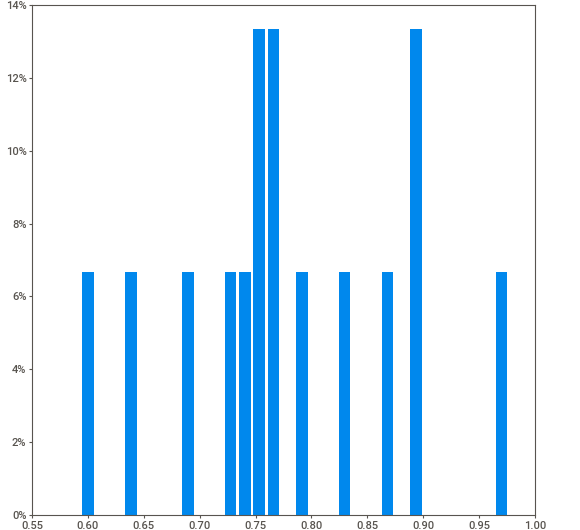
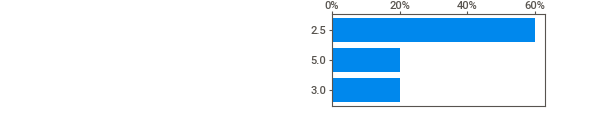
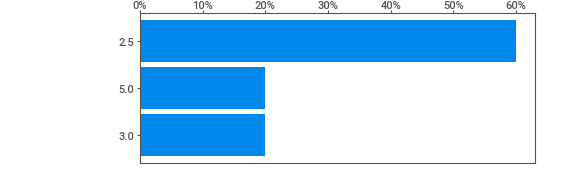
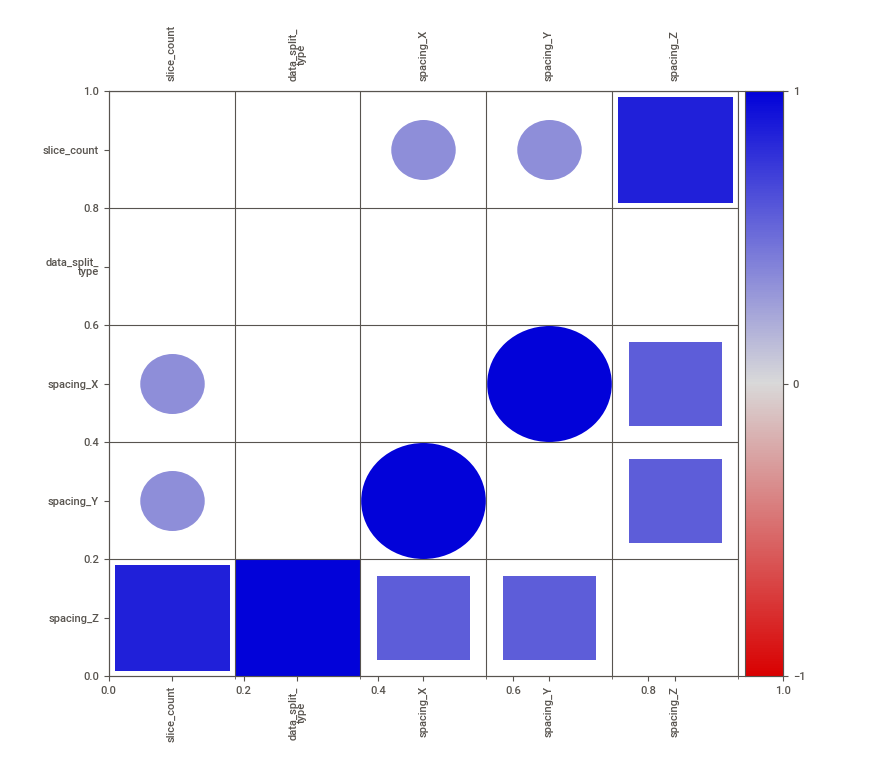
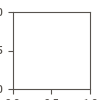

Report 'results/EDA/test_data_EDA_report.html' was saved to storage.


In [7]:
# Test is CT level, due to no labels
generate_sweetviz_report(
    test_data, report_filename="results/EDA/test_data_EDA_report.html"
)